##### Credits

creation date: 07/2023

author: Laetitia Lanfranchi

##### Librairies

In [3]:
# Usual suspects
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# Preprocessing
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import FunctionTransformer

In [7]:
# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.base import TransformerMixin, BaseEstimator
from tempfile import mkdtemp
from shutil import rmtree
from sklearn import set_config; set_config(display='diagram')

In [8]:
# Model selection
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [9]:
# Metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import get_scorer_names, make_scorer
# from sklearn.metrics import r2, max_error, mean_squared_error, explained_variance
# from sklearn.metrics import accuracy_score, balanced_accuracy, f1, neg_log_loss, recall_score
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

In [10]:
# Supervised - regressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from xgboost import XGBRegressor

In [11]:
# Supervised - classifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [12]:
# Unsupervised
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans

In [13]:
# Time series
from statsmodels.graphics.tsaplots import plot_predict, plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [14]:
# NLP
import string
import re

import nltk
# nltk.download('punkt');
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation

##### Data

In [15]:
###### Load data
from sklearn.datasets import load_diabetes, load_wine, fetch_california_housing, load_iris
X_diabetes, y_diabetes = load_diabetes(return_X_y=True, as_frame=True, scaled=False)
data_diabetes = X_diabetes
data_diabetes['target'] = y_diabetes
X_diabetes.drop('target', axis=1, inplace=True)

X_wine, y_wine = load_wine(return_X_y=True, as_frame=True)
data_wine = X_wine
data_wine['target'] = y_wine
X_wine.drop('target', axis=1, inplace=True)

X_calihouse, y_calihouse = fetch_california_housing(download_if_missing=True, return_X_y=True, as_frame=True)
data_calihouse = X_calihouse
data_calihouse['target'] = y_calihouse
X_calihouse.drop('target', axis=1, inplace=True)

X_iris, y_iris = load_iris(return_X_y=True, as_frame=True)
data_iris = X_iris
data_iris['target'] = y_iris
X_iris.drop('target', axis=1, inplace=True)

data_penguins = sns.load_dataset("penguins")
X_penguins = data_penguins.drop(columns='species')
y_penguins = data_penguins['species']

data_titanic = sns.load_dataset('titanic')

X_titanic_c = data_titanic.drop_duplicates().drop(columns=['alive', 'survived'])
y_titanic_c = data_titanic.drop_duplicates()['survived']

X_titanic_r = data_titanic.drop_duplicates().drop(columns=['fare'])
y_titanic_r = data_titanic.drop_duplicates()['fare']

# data_nba = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv')
# # https://www.kaggle.com/datasets/visalakshiiyer/nba-match-data
# X_nba = data_nba.drop('win_rating', axis=1)
# y_nba = data_nba['win_rating']

# dict_ = {
#     'name': ['diabetes', 'wine', 'calihouse', 'iris', 'penguins', 'nba'],
#     'data_': [data_diabetes, data_wine, data_calihouse, data_iris, data_penguins, data_nba],
#     'X_': [X_diabetes, X_wine, X_calihouse, X_iris, X_penguins, X_nba],
#     'y_': [y_diabetes, y_wine, y_calihouse, y_iris, y_penguins, y_nba],
# }

In [16]:
data_titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


# Scikit learn cheatsheets

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# Features preparation

## Preprocessing

### Split, duplicate and missings

##### **Duplicates**

In [17]:
data_titanic.duplicated().sum()/len(data_titanic);
data_titanic.drop_duplicates();

#####  **Split train and test**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_c, 
    y_titanic_c, 
    test_size=0.3,
    shuffle=True,
    stratify=y_titanic_c,
    random_state=42)

##### Imputer

- SimpleImputer > replace with simple strategies
- IterativeImputer() > estimation from other features
- MissingIndicator() > binary
- KNNImputer() > use k-nearest neighbors

- Series.fillna(1, inplace=True)

In [19]:
X_titanic_c.isnull().sum() / len(X_titanic_c);

X_train_proc, X_test_proc = pd.DataFrame(), pd.DataFrame()

X_train_proc[['pclass', 'sex', 'sibsp', 'parch', 'class', 'who', 'adult_male', 'alone']] = X_train[['pclass', 'sex', 'sibsp', 'parch', 'class', 'who', 'adult_male', 'alone']]
X_test_proc[['pclass', 'sex', 'sibsp', 'parch', 'class', 'who', 'adult_male', 'alone']] = X_test[['pclass', 'sex', 'sibsp', 'parch', 'class', 'who', 'adult_male', 'alone']]

In [20]:
imputer = SimpleImputer(
    missing_values=np.nan,   # np.nan, int, float, str, None, pandas.NA
    strategy='mean',         # 'mean', 'median', 'most_frequent', 'constant'
    fill_value=None,         # for constant strategy
)

imputer.fit(X_train[['age', 'fare']]) 

X_train_proc[['age', 'fare']] = imputer.transform(X_train[['age', 'fare']]) 
X_test_proc[['age', 'fare']] = imputer.transform(X_test[['age', 'fare']]) 

imputer.feature_names_in_
imputer.n_features_in_
imputer.statistics_

array([29.83947368, 32.87296916])

In [21]:
imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_mf.fit(X_train[['embarked', 'embark_town']]) 

X_train_proc[['embarked', 'embark_town']] = imputer_mf.transform(X_train[['embarked', 'embark_town']]) 
X_test_proc[['embarked', 'embark_town']] = imputer_mf.transform(X_test[['embarked', 'embark_town']]) 

In [22]:
X_train_proc.isnull().sum() / len(X_train_proc);

### Visualisation

##### Categorical features: count

In [ ]:
features_cat = X_train.select_dtypes(include=['object', 'category', 'bool']).columns[0:4]

In [ ]:
##### Figure
mosaic = '''ABCD
            ABCD
            '''
mosaiq_ = list(set([[*mosaic][i] for i in range(len(mosaic)) if [*mosaic][i].isalnum()]))

fig = plt.figure(constrained_layout=False, figsize=(10,2))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=1)
ax = fig.subplot_mosaic(mosaic)
fig.suptitle('Count of categorical features', color='#3f3f3f', y=1.05, fontweight='bold', fontsize='large')

##### Data
for i, feature in zip(mosaiq_, features_cat):
    sns.countplot(data=X_train, x=feature,
                  alpha=0.8, orient='h', 
                  ax=ax[i]);

##### Style
for i in mosaiq_:
    ax[i].set_xlabel(ax[i].get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
    ax[i].set_ylabel('', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
    ax[i].grid(axis="both", lw=0.5, ls=':')
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

##### Numerical features: histplot and boxplot

In [ ]:
features_num = X_train.select_dtypes(include=['float', 'int']).columns[0:4]

In [ ]:
##### Figure
mosaic = '''ABCD
            ABCD
            IJKL
            '''

mosaiq_hist = ['A', 'B', 'C', 'D']
mosaiq_box = ['I', 'J', 'K', 'L']

fig = plt.figure(constrained_layout=False, figsize=(10,3))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=1)
ax = fig.subplot_mosaic(mosaic)
fig.suptitle('Distribution of numerical features', color='#3f3f3f', y=1.05, fontweight='bold', fontsize='large')

##### Data
for i, feature in zip(mosaiq_hist, features_num):
    sns.histplot(data=X_train, 
                 x=feature, label=feature,
                 shrink=0.8, edgecolor=None, kde=True,
                 ax=ax[i]);

for i, feature in zip(mosaiq_box, features_num):
    sns.boxplot(data=X_train, x=feature,
            orient='h', saturation=0.9, 
            showmeans=True, meanprops=dict(markerfacecolor='w', markeredgecolor='w', marker='o'),
            medianprops=dict(color='w', alpha=1, linewidth=2), boxprops=dict(linewidth=False),
            whiskerprops=dict(color='#151515', linewidth=1), capprops=dict(color='#151515', linewidth=1),
            showfliers=True, fliersize=3, flierprops=dict(markerfacecolor='#6a6a6a', markeredgecolor='#6a6a6a', marker='d'),
            ax=ax[i])

##### Style
for i in mosaiq_hist + mosaiq_box:
    ax[i].set_xlabel(ax[i].get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
    ax[i].set_ylabel('', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
    ax[i].grid(axis="both", lw=0.5, ls=':')
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

##### Features & target relations

### Scaling and encoding

#### Initialization

In [ ]:
X_train_num = X_train.select_dtypes(include=['float', 'int'])
X_test_num = X_test.select_dtypes(include=['float', 'int'])

X_train_cat = X_train.select_dtypes(include=['object', 'category', 'bool'])
X_test_cat = X_test.select_dtypes(include=['object', 'category', 'bool'])

#### Feature scaling - numerical features

##### StandardScaler: Zscore, scale according to mean and standard deviation

- For normally distributed features, sensitive to outliers
- Distord relative distances > not appropriate for KNN
- Can be applied to sparse CSR or CSC matrices with_mean=False to avoid breaking data sparsity structure
- Linear Regression and Neural Networks work quite well with zero-centered features

In [ ]:
scaler = StandardScaler(
    with_mean=True,
    with_std=True
)

scaler.fit(X_train_num)

X_train_scaled, X_test_scaled = pd.DataFrame(), pd.DataFrame()
X_train_scaled, X_test_scaled = scaler.transform(X_train_num), scaler.transform(X_test_num)

scaler.n_features_in_
scaler.n_samples_seen_
scaler.scale_                # sqrt(var_) before scaling. relative scaling
scaler.mean_                 # mean before scaling
scaler.var_;                  # variance before scaling

##### MinMaxScaler: normalize between 0 and 1

- Neither reduces the effect of outliers nor changes skewness >> if outliers are full part of the dataset
- Preserve matrix sparsity >> for positive feature and sparse matrix (eg RGB values in a picture)
- For ordinal features
- For KKN models

In [ ]:
scaler = MinMaxScaler(
    feature_range=(0,1),
    clip=False
)

scaler.fit(X_train_num)

X_train_scaled, X_test_scaled = pd.DataFrame(), pd.DataFrame()
X_train_scaled, X_test_scaled = scaler.transform(X_train_num), scaler.transform(X_test_num)

scaler.n_features_in_
scaler.n_samples_seen_
scaler.scale_                # Relative scaling per feature
scaler.min_                  # Adjustment for minimum
scaler.data_min_             
scaler.data_max_
scaler.data_range_;

##### RobustScaler: scale according to Median & IQR

- Minimize the effect of outliers >> Not appropriate for sparse matrix

In [ ]:
scaler = RobustScaler(       
    with_centering=True,
    with_scaling=True,
    quantile_range=(25,75),
)

scaler.fit(X_train_num)

X_train_scaled, X_test_scaled = pd.DataFrame(), pd.DataFrame()
X_train_scaled, X_test_scaled = scaler.transform(X_train_num), scaler.transform(X_test_num)

scaler.n_features_in_
scaler.center_                # median value (before scaling) (after it is 0 with centering)
scaler.scale_;                # interquartile range (before scaling, after it is 1 with scaling)

##### See also 

- MaxAbsScaler
- Normalizer

<font color='red'>Check the differences with: maxabs_scale, minmax_scale, normalize, robust_scale or scale</font>

#### Feature encoding - categorical features

##### OneHotEncoder, if cardinality not too high

In [ ]:
ohe = OneHotEncoder(
#     categories = [['Male', 'Female', np.nan]],  # 'auto' or list
#     dtype=np.float64,
    drop='if_binary',                              # 'if_binary', 'first' > breaks symmetry, can induce a bias in downstream models
    sparse=False,
    handle_unknown='ignore',
)

ohe.fit(X_train_cat)

X_train_cat[ohe.get_feature_names_out()] = ohe.transform(X_train_cat)
X_test_cat[ohe.get_feature_names_out()] = ohe.transform(X_test_cat)

ohe.categories_
ohe.n_features_in_
ohe.feature_names_in_;

# ohe.get_params()
# ohe.get_feature_names_out()
# ohe.get_metadata_routing()
# ohe.inverse_transform()
# ohe.set_output()
# ohe.set_params()

##### Ordinal encoder, for ranked categories

In [ ]:
ordinal_encoder = OrdinalEncoder(
    categories = [['First', 'Second', 'Third']],        # 'auto' or list
#     dtype=np.float64,
    handle_unknown='use_encoded_value',
    unknown_value = np.nan,
)

ordinal_encoder.fit(X_train[['class']])

X_train[ordinal_encoder.feature_names_in_] = ordinal_encoder.transform(X_train[['class']])
X_test[ordinal_encoder.feature_names_in_] = ordinal_encoder.transform(X_test[['class']])

ordinal_encoder.categories_
ordinal_encoder.n_features_in_
ordinal_encoder.feature_names_in_;

# ordinal_encoder.get_params()
# ordinal_encoder.get_feature_names_out()
# ordinal_encoder.get_metadata_routing()
# ordinal_encoder.get_params()
# ordinal_encoder.inverse_transform()
# ordinal_encoder.set_output()
# ordinal_encoder.set_params()

#### Target encoding

##### Label encoding

In [ ]:
label_encoder = LabelEncoder()

label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

y_decoded = label_encoder.inverse_transform(y_test)

label_encoder.classes_;

# label_encoder.get_params()
# label_encoder.get_metadata_routing()
# y_train = label_encoder.inverse_transform(y_train)
# label_encoder.set_output()
# label_encoder.set_params()

##### See also: TargetEncoder

### Balancing

https://imbalanced-learn.org

For train only

See Deep Learning Snapshots for more details

In [4]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

##### **Undersampling** of majority class

##### Oversampling a minority class (or compute new instances of the minority class)

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X_train['MedInc'].values, y_train.values)

##### **SMOTE and ADASYN** - new samples in by interpolation

- **SMOTE, Synthetic Minority Oversampling TEchnique** - generating samples next to the original samples, without distinction between easy and hard samples to be classified using the nearest neighbors rule
- **ADASYN, Adaptive Synthetic** - generating samples next to the original samples which are wrongly classified using a k-Nearest Neighbors classifier

In [ ]:
# from imblearn.over_sampling import SMOTE, ADASYN
# X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
# X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

### Features transformation

##### Cyclical engineering / temporal features

In [ ]:
# Month of the year
X_train = pd.DataFrame(np.random.randint(1, 13, size = (1000, 1)), columns=['MoY'])
X_train['sin_MoY'] = np.sin( 2 * np.pi * X_train['MoY'] / 12)
X_train['cos_MoY'] = np.cos( 2 * np.pi * X_train['MoY'] / 12)

# Day of the week
X_train = pd.DataFrame(np.random.randint(1, 8, size = (1000, 1)), columns=['DoW'])
X_train['sin_DoW'] = np.sin( 2 * np.pi * X_train['DoW'] / 7)
X_train['cos_DoW'] = np.cos( 2 * np.pi * X_train['DoW'] / 7)

# Hour of the day
X_train = pd.DataFrame(np.random.randint(1, 25, size = (1000, 1)), columns=['HoD'])
X_train['sin_HoD'] = np.sin( 2 * np.pi * X_train['HoD'] / 24)
X_train['cos_HoD'] = np.cos( 2 * np.pi * X_train['HoD'] / 24)

# Seconds of the hour
X_train = pd.DataFrame(np.random.randint(1, 60*60+1, size = (1000, 1)), columns=['SoH'])
X_train['sin_SoH'] = np.sin( 2 * np.pi * X_train['SoH'] / (60*60) )
X_train['cos_SoH'] = np.cos( 2 * np.pi * X_train['SoH'] / (60*60) )

##### Linear combination of features

##### Discretisation, categorization

See also: 
- Binarizer / binarize
- LabelBinarizer / label_binarize 
- MultiLabelBinarizer
- KBinsDiscretizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_calihouse, y_calihouse, test_size=0.3, random_state=6)

In [ ]:
X_train['MedInc_class'] = pd.cut(x = X_train['MedInc'],
                                 bins=[X_train['MedInc'].min()-1,
                                       sp.stats.mstats.mquantiles(X_train['MedInc'])[0],
                                       X_train['MedInc'].mean(),
                                       sp.stats.mstats.mquantiles(X_train['MedInc'])[2] + 1.5*sp.stats.iqr(X_train['MedInc']),
                                       X_train['MedInc'].max()+1], 
                                 labels=['low', 'middle', 'high', 'exceptional'])

##### Logarithm features

If feature is extremely skewed

##### Polynomial features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nba[['mp']], y_nba, test_size=0.3, random_state=6)

In [ ]:
# Section purpose
polynomial_features = PolynomialFeatures(degree=2, 
                                         include_bias=False) # to note have a column of 1's

polynomial_features.fit(X_train)

X_train_poly = polynomial_features.transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

In [ ]:
# Example visualisation
model = LinearRegression()
model.fit(X_train_poly, y_train)

fig = plt.figure(constrained_layout=False, figsize=(5,3))
ax = fig.subplots()
sns.scatterplot(x=X_train['mp'], y=y_train, alpha=0.5, label='Target against feature, real data')
sns.scatterplot(x=X_test['mp'], y=model.predict(X_test_poly), marker='.', color='r', label='Prediction with polynomial feature');
ax.set_xlabel(ax.get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel(ax.get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
ax.legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
ax.legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
ax.grid(axis="both", lw=0.5, ls=':')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

##### See also

- FunctionTransformer
- PowerTransformer / power_transform
- QuantileTransformer / quantile_transform
- SplineTransformer
- KernelCenterer
- add_dummy_feature

## Feature selection

*Garbage in → garbage out, noise // Curse of dimensionality and data sparsity // Reducing complexity*

##### Initialisation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nba, y_nba, test_size=0.3, random_state=6)

##### Strict colinearity (univariate)

In [ ]:
np.linalg.matrix_rank(X_train) == X_train.shape[1] ### Should be True

##### Pearson correlation (univariate)

In [ ]:
sns.heatmap(X_train.corr(),
            vmin=-1, vmax=1, 
            cmap='BrBG',
            annot=True, fmt='.2f', annot_kws={"size": 8},
            square=True, cbar=False, cbar_kws=dict(orientation='vertical'),
            linewidths=0.5, linecolor='w');

In [ ]:
corr_df = np.abs(X_train.corr()).stack().reset_index()
corr_df.columns = ['feature_1','feature_2', 'abs_corr']
corr_df = corr_df[ corr_df['feature_1'] != corr_df['feature_2']]
corr_df.sort_values(by='abs_corr', ascending=False)

##### VIF - amount of colinearity per feature

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nba, y_nba, test_size=0.3, random_state=6)
features_num = X_train.select_dtypes(exclude=['object']).columns[0:4]
X_train.fillna(1, inplace=True)

In [ ]:
vif_ = pd.DataFrame()
for i in range(len(features_num)):
    vif_.loc[features_num[i], 'vif'] = vif(X_train[features_num], i)
vif_.sort_values(by='vif', ascending=False)

##### Permutation importance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=6)

In [ ]:
model = LinearRegression()
model = model.fit(X_train, y_train) 

scoring = [
    # Regression
        'r2', 'max_error',
#         'neg_mean_absolute_error', 'neg_median_absolute_error',
#     # Classification
#         'accuracy', 'balanced_accuracy', 'top_k_accuracy',
#         'recall', 'precision', 'average_precision', 
#         'f1', 'f1_micro', 'f1_macro', 'f1_weighted',
#     # Clustering
#         # to be completed
        ]

permutation_score = permutation_importance(
    model, 
    X_train, 
    y_train,
    scoring=scoring,
#     n_repeats=5,
    random_state=6,
    n_jobs=-1,
#     sample_weight=None,
#     max_samples=1
) 

imp = {'feature': X_train.columns}

for s in scoring:
    imp[s +'_decrease_mean'] = permutation_score[s]['importances_mean']
    imp[s +'_decrease_std'] = permutation_score[s]['importances_std']

pd.DataFrame(imp).sort_values(by=scoring[0]+'_decrease_mean', ascending=False)

##### Use models to select features

- **Decision tree** and feature importance

- **PCA** and  variance explained

- **Lasso penalty** (which shrinks the influence of (some) features to zero)

##### <font color='red'>Select Percentil : a faire</font>

klearn.feature_selection.SelectPercentil

# Model selection

##### Initialisation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_calihouse, y_calihouse, test_size=0.3, random_state=6)
X_train = RobustScaler().fit(X_train).transform(X_train)
model = ElasticNet()

##### Standard <font color='blue'>cross validation</font>

<font color='red'> StratifiedKFold : A CREUSER</font> 

In [ ]:
cross_validate(
    model, 
    X_train, 
    y_train, 
    cv = 5,                              # or cv=10 or cv=cv if cv defined avec StratifiedKFold, à creuser 
    scoring = [
            # Regression
                'r2', 'max_error', 
#                 'neg_mean_absolute_error', 'neg_median_absolute_error',
#             # Classification
#                'accuracy', 'balanced_accuracy', 'top_k_accuracy',
#                'recall', 'precision', 'average_precision', 
#                'f1', 'f1_micro', 'f1_macro', 'f1_weighted',
#             # Clustering
#                 # to be completed
                ],
    fit_params = None,          # dict. parameters passed to the fit method of the estimator
    n_jobs = -1
);

In [ ]:
cross_val_predict(
    model, 
    X_train, 
    y_train, 
    cv = 5, # or cv=10
    method='predict',        # ‘predict’, ‘predict_proba’, ‘predict_log_proba’, ‘decision_function’
    fit_params = None,       # dict. parameters passed to the fit method of the estimator
    n_jobs = -1
);

##### <font color='blue'>Grid Search</font> Cross Validation

Look for the best hyperparameters with value combinations

In [ ]:
grid = {
    'alpha': [0.01, 0.1, 1], 
    'l1_ratio': [0.2, 0.5, 0.8],
    'fit_intercept': [True, False]
}

search = GridSearchCV(
    model,
    grid, 
    scoring='r2',
    cv=5,
    n_jobs=-1
) 

search.fit(X_train, y_train)

# search.best_score_
# search.best_estimator_
# search.best_params_

##### <font color='blue'>Randomized Search</font> Cross Validation

In [ ]:
grid = {
    'l1_ratio': sp.stats.uniform(0, 1), 
    'alpha': sp.stats.loguniform(0.0001, 0.01),
    'fit_intercept': [True]
}

search = RandomizedSearchCV(
    model,
    grid, 
    scoring='r2',
    n_iter=100,  # number of draws
    cv=5, n_jobs=-1, random_state=None,
)

search.fit(X_train, y_train)
search.best_estimator_
search.best_params_, search.best_score_

##### Usefull graphs with scipy stats 

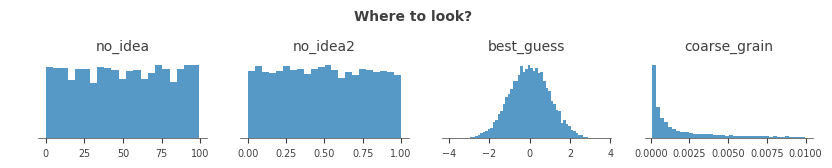

In [4]:
no_idea = sp.stats.randint(0, 100)
no_idea2 = sp.stats.uniform(0, 1)
best_guess = sp.stats.norm(0, 1)
coarse_grain = sp.stats.loguniform(0.0001, 0.01)

mosaic_str = '''ABCD
                ABCD
                '''
mosaiq_li = ['A', 'B', 'C', 'D']
fig = plt.figure(figsize=(10, 1))
ax = fig.subplot_mosaic(mosaic_str)
fig.suptitle('Where to look?',color='#3f3f3f', y=1.4, fontweight='bold', fontsize='medium')

sns.histplot(no_idea.rvs(size=10000), edgecolor=None, ax=ax['A'])
sns.histplot(no_idea2.rvs(size=10000), edgecolor=None, ax=ax['B'])
sns.histplot(best_guess.rvs(size=10000), edgecolor=None, ax=ax['C'])
sns.histplot(coarse_grain.rvs(size=10000), edgecolor=None, ax=ax['D']);

ax['A'].set_title('no_idea', loc='center', pad=8, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax['B'].set_title('no_idea2', loc='center', pad=8, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax['C'].set_title('best_guess', loc='center', pad=8, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax['D'].set_title('coarse_grain', loc='center', pad=8, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})

##### Style
for i in mosaiq_li:
    ax[i].set_ylabel('')
    ax[i].spines[['right', 'top', 'left']].set_visible(False)
    ax[i].spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].tick_params(axis='x', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')
    ax[i].tick_params(axis='y', color='w', colors='w', labelsize='x-small')

##### <font color='red'>make_scorer: a creuser</font>

In [ ]:
model.fit(X_train, y_train)

make_scorer(
    mean_squared_error,
)

##### <font color='blue'>Learning curve</font>: compare train and test score (or error) learning against dataset size

- Objectiv 1: high score and convergence of the score (delta < 1%) >> do not over or underfit
- Objectiv 2: find the trade-off between training size / time and high-performance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nba, y_nba, test_size=0.3, random_state=6)
scaler = RobustScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)
model = LinearRegression()

In [ ]:
train_sizes = np.arange(50, round(0.7*len(X_train)), 10)

train_sizes, train_scores, test_scores = learning_curve(
    model, X=X_train, y=y_train, 
    train_sizes=train_sizes, 
    scoring='r2', random_state=6, 
    cv=5, 
#     n_jobs=-1, shuffle=False, fit_params=None
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

In [ ]:
fig = plt.figure(figsize=(8,3))
ax = plt.subplot()

sns.lineplot(x=train_sizes, 
             y=train_scores_mean, 
             label='train', 
             ls='-', lw='1', marker='', 
             ax=ax);

sns.lineplot(x=train_sizes,
             y=test_scores_mean, 
             label='test', 
             ls='-', lw='1', marker='', 
             ax=ax);

ax.set_xlabel('train_sizes', loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel('score', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
ax.set_title('Learning curve', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax.legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
ax.legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
ax.grid(axis="both", lw=0.5, ls=':')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

##### Over and under fitting against <font color='blue'>bias and variance</font>

**Overfitting:** 
- high variance, capture noise
- Low score on the test dataset while good score on the train dataset
- Score learning curve of the test dataset smaller than the train dataset
- Error learning curve of the test dataset bigger than the train dataset

> Solution when overfitting:
> - More observations
> - Feature selection (including dimensionality reduction with unsupervised learning > PCA and decision tree)
> - Regularization of the loss function
> - Early stopping (deep learning)

**Underfitting:**
- high bias
- low score in both training and test sets

TotalError = Bias² + Variance + Irreductible Error

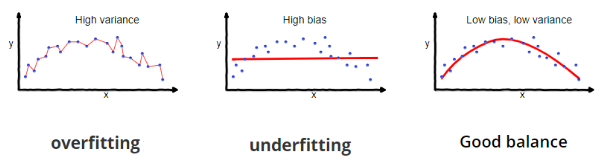

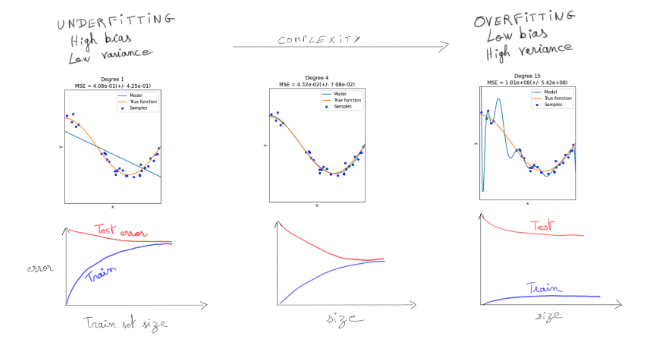

##### Over and under fitting against <font color='blue'>model complexity</font>

<div>
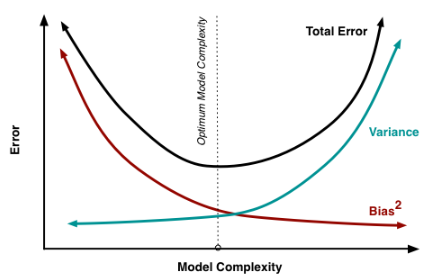
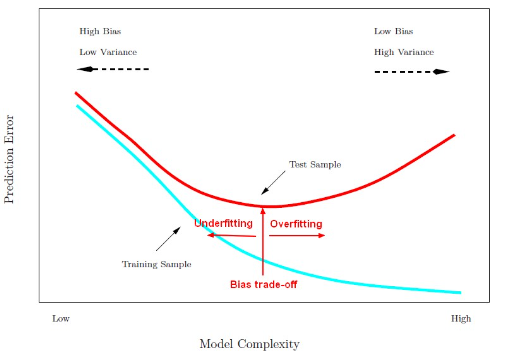 
</div>

# Supervised models

## Regression models

##### Initialisation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nba, y_nba, test_size=0.3, random_state=6)
scaler = RobustScaler().fit(X_train)
X_train[X_train.columns], X_test[X_train.columns] = scaler.transform(X_train), scaler.transform(X_test)

### Scoring, loss, distance and vector

##### Scoring / metrics: <font color='blue'>R2, MSE, RMSE, MAE, MaxError</font>

In [ ]:
scoring_possible_values = get_scorer_names()

**Determination coeff - R2**
- Proportion of the variance explained
- To be used when the unit of the error is not important
- General "goodness-of-fit"
- eg: compare changes in models / data

**Mean Squared Error (MSE)**
- Useful to penalize large errors more strictly than small ones, very sensitive to outliers
- No sense of direction
- Not expressed in the same units as the target
- Used when large errors have a disproportionnally bigger impact
- Used to compare the sensitivity of different models to large errors

**Root Mean squared error (RMSE)**
- MSE in the unit of the target, more interpretable

**Mean absolute error (MAE)**
- Less sensitive to outliers
- No sense of direction
- Errors can be penalized proportionally to their size
- eg: weather forecast

**Max Error**
- To limit the magnitude of the errors
- eg: temperature mgt for a datacenter

##### Loss Function: <font color='blue'>MSE, MAE, Huber</font>

*See: Energy landscape of the Loss function // Loss needs to be (sub)differentiable*

**MSE** (Mean squared error)
- very sensitive to outliers

**MAE** (Mean absolute error)
- require eta to decrease at each epoch

**Huber** (Smooth Absolute Loss)
- MAE which becomes MSE when error is small
- Hyperparamter epsilon
- Adjustable for outliers
- Slope can be used as an indicator of reaching minima

##### Distances

##### Vectors

### Linear models (parametric)

##### <font color='blue'>LinearRegression</font>  - Ordinary least squares Linear Regression

Loss = Mean Squared Error

<font color='red'>Solver = Gradient Descent</font>

In [ ]:
model = LinearRegression(
    # Model specificities
    fit_intercept=True,
    positive=False,              # force the coeff to be positiv, only for dense arrays

    # Other hyperparameters
    n_jobs=-1, 
)

model.fit(X_train, y_train)
model.score(X_test, y_test) # r2

##### <font color='blue'>Ridge</font> / Tikhonov - Linear least squares with l2 regularization

Loss = MSE + alpha * l2

In [ ]:
model = Ridge(
    # Model specificities
    fit_intercept=True, 
    positive=False,     # Forces the coefficients to be positive. Only with lbfgs
    
    # Loss & penalty
    alpha=1,            # Constant of the L2 regularizer
    
    # Solver
    solver='auto',      # 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'
    max_iter=None,      # for gradient solver
    tol=0.0004,         # precision of the solution. Not used for svd and cholesky
    
    # Other hyperparameters
    random_state=None,
)
model.fit(X_train, y_train)
model.score(X_test, y_test) # r2

##### <font color='blue'>Lasso</font> - Linear Model trained with L1 prior as regularizer

Loss = MSE + alpha * l1

<font color='red'>Solver = Gradient Descent</font>

In [ ]:
model = Lasso(
    # Model specificities
    fit_intercept=True, 
    
    # Loss & penalty
    alpha=1,                 # Constant of the L1 regularizer
    
    # Solver
    max_iter=1000,
    tol=0.0001,
    precompute=False,        # something about gram matrix
    warm_start=False,
    selection='cyclic',        # random coeff update at each iteration, no sequential looping over features
    
    # Other hyperparameters
    random_state=None,
 
)
model.fit(X_train, y_train)
model.score(X_test, y_test)

##### <font color='blue'>ElasticNet</font> - Linear regression with combined L1 and L2 priors as regularizer

Loss = MSE + alpha * ( gamma * l1 + (1-gamma) * l2 )

<font color='red'>Solver = Gradient Descent</font>

In [ ]:
model = ElasticNet(
    # Model specificities
    fit_intercept=True,
    positive=False,     # Forces the coefficients to be positive. Only with lbfgs
    
    # Loss & penalty
    alpha=1.0,               # Constant of the penalty term
    l1_ratio=0.5,            # l1=0 >> penalty = l2
    
    # Solver
    max_iter=1000,
    tol=0.0001,
    precompute=False,        # something about gram matrix
    warm_start=False,
    selection='cyclic',        # random coeff update at each iteration, no sequential looping over features
    
    # Other hyperparameters
    random_state=None,
    
)
model.fit(X_train, y_train)
model.score(X_test, y_test)

##### <font color='blue'>SGDRegressor</font> - Linear model fitted by minimizing a regularized empirical loss with Stochastic Gradient Descent

Solver = Stochastic Gradient Descent

In [ ]:
model = SGDRegressor(
    # Model specificities
    fit_intercept=True,            # If false, data is assumed to be already centered

    # Loss & penalty
    loss='squared_error',          # 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'
    penalty='l2',                  # 'l2', 'l1', 'elasticnet', 'None' 
    alpha=0.0001, 
    l1_ratio=0.15, 
    epsilon=0.1,                   # for huber or episolon-co loss

    # Solver
    max_iter=1000,
    tol=0.001,
    eta0=0.01, 
    learning_rate='invscaling', 
    power_t=0.25,
    
    early_stopping=False, 
    validation_fraction=0.1, 
    n_iter_no_change=5, 

    warm_start=False, 
    average=False,

    shuffle=True,
    random_state=None,
    
    # Other hyperparameters
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

##### See also

In [ ]:
# model.predict(X_test)
# model.coef_
# model.intercept_
# model.n_iter_

- Bayesian Regressor
    - ARDRegression
    - BayesianRdige
- Multi-task
    - MultiTaskElasticNet
    - MultiTaskLasso
- Outlier robust
    - <font color='blue'>HuberRegressor</font>
    - QuantileRegressor
    - RANSACRegressor
    - TheilSenRegressor
- Generalized Linear Models GLM
    - PoissonRegressor
    - TweedieRegressor
    - GammaRegressor

### Distance models (non parametric)

##### initialisation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nba, y_nba, test_size=0.3, random_state=6)
features_num = X_train.select_dtypes(exclude=['object']).columns
scaler = RobustScaler().fit(X_train[features_num])
X_train[features_num], X_test[features_num] = scaler.transform(X_train[features_num]), scaler.transform(X_test[features_num])

##### <font color='blue'>KNeighborsRegressor</font> - Regression. Interpolation of the target of the  k-nearest neighbors

- Distance / metric of the KNN "plays the role" of the loss function in linear models. <font color='red'>__Confirm that penalyt is never used in Knn models__</font>
- Algo used to compute the nearest neighbors "plays the role" of the solver in linear models.


- k too small, risk of overfitting
- Knn has the ability to capture non-linear pattern
- Extremely sensitiv to the scale of features 

<font color='red'> Knn is not great if the mean values of the features increase in new new datasets (eg: turnover in a scale up)<font> 
    
<font color='red'> Check results of Knn prediction</font>
    
<font color='red'> Check the metric used for scoring. Same as the one used for distance minimization, ie loss function?</font>    

In [ ]:
model = KNeighborsRegressor(
    # Model specificities
    n_neighbors=5,
    
    # Loss & penalty
    p=2,                       # 2 > euclidean distance, 1 > manhattan, p > Minkowski distance l_p
    weights='uniform',         # 'uniform', 'distance' or [callable]
    metric='minkowski',        # Metric to use for distance computation
    metric_params=None,        # Additional arguments for the metric function
    
    # Solver
    algorithm='auto',          # Algo used to compute nearest neighbors. 'auto', 'ball_tree', 'kd_tree', 'brute'
    leaf_size=30,              # for ball_tree or kd_tree. Impact the speed of the construction.
            
    # Other hyperparameters   
    n_jobs=-1,
    
)
model.fit(X_train, y_train)

model.predict(X_test)
model.predict(X_test.iloc[0:1]), model.kneighbors(X_test.iloc[0:1])
# model.kneighbors_graph()

model.score(X_test, y_test)

### Support vector (non parametric)

##### <font color='blue'>SVR</font> - Vector based models - SVM support vector machine

*See description in section 'Classifier models > SVM'*

Regression: fit as many points as possible within the street

<font color='red'>Is the loss a hinge ?</font>

In [ ]:
model = SVR(
    # Model specificities
    kernel='rbf',         # 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or callable
    degree=3,             #  only for kernel = poly
    gamma='scale',        # 'scale' or 'auto'. Kernel coeff for rbf, poly and sigmoid
    coef0=0,              # independant term in kernel function - only for poly and sigmoid
    cache_size=200,       # Size of the Kernel Cache
    
    # Loss & penalty
    C=1,                  # Inversely proportional to the strength of regul. Penalty = l2 
    epsilon=0.1,          # no penalty is associated within a distance epsilon
    
    # Solver
    tol=0.001, 
    max_iter=-1,
    shrinking=True,       # ?

    # Other hyperparameters
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

##### See also

LinearSVR

NuSVR

### Decision Trees  (non parametric)

##### <font color='blue'>Decision trees</font>

- **Loss** = MSE
- **Solver** = Binary decision at each step, without reconsidering the previous choice. Can fall into minimum local. The root node is not necessarly the better. It overfits rapidely with the number of nodes (determined by max_depth or max.. or min..)
- <font color='blue'>**Gini index**: the lower the better</font>
- Gini index = 1 - sum proba² = impurity of each node.
- Root node > Internal node > Leaf.

**Pro**: 
- No scaling necessary and resistant to outliers
- Intuitive and easy to interpret
- Usefull for feature selection
- Non linear modeling

**Con**: 
- High variance and long training time
- Splits data 'orthogonally' to features (> PCA)
- Could easily fall into a local minimum

In [ ]:
model = DecisionTreeRegressor(
    # Choose between :
#     max_depth=2,                # None by default > until all leaves are pure or contain less than min_samples_split   
#     min_samples_split=500,             # min for a node 
    min_samples_leaf=500,                # min size of the leaf
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
feature_importance = pd.DataFrame({'feature': X_test.columns, 
                                   'importance': model.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)              

In [ ]:
export_graphviz(
    model, 
    out_file="tree.dot", 
    feature_names=X_train.columns,
    class_names=['0','1','2'], 
    rounded=True, 
    filled=True
)

with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### Bagging (similar models in parallel)

##### Overview on bagging, ensemble method

Weak learners are trained, in parallel, on boostrapped (with replacement) samples of the dataset. 

Predictions are the averaged predictions of the weak_learners.

**Pro:** 
- reduce variance (overfitting !)
- can be applied to any model

**Con:**
- Complex structure
- Long training time
- Disregards the perf of individual sub models

##### <font color='blue'>Bootstrap Agregating</font> (on any model)

In [ ]:
weak_learner = KNeighborsRegressor(n_neighbors=3)
# weak_learner = LinearRegression()

model = BaggingRegressor(
    weak_learner, 
    n_estimators=40,
    oob_score=True,                 # Out of bag score, on data that has not be seen.
)

model.fit(X_train, y_train)
model.score(X_test, y_test)
model.oob_score_

##### <font color='blue'>Random Forest</font> (bagging on decision tree)

Good practice: **lots of trees with low depth**

In [ ]:
model = RandomForestRegressor(
    n_estimators=50,
    
    # Choose between :
    max_depth=2,                # None by default > until all leaves are pure or contain less than min_samples_split   
#     min_samples_split=500,             # min for a node 
#     min_samples_leaf=500,                # min size of the leaf

)

model.fit(X_train, y_train)
model.score(X_test, y_test)

### Boosting (similar models sequentially)

##### Overview on boosting, ensemble method

Weak learners are trained, sequentially, with a focus (more weights given to) on bad predictions of the previous weaklearners

Pros: 
- Strong sub-models have more influence in final decision
- Reduces bias

Cons:
- Computationally expensive (sequential)
- Easily overfits (except XGBoost which use a val to prevent overfitting)
- Sensitive to outliers (too much time spent trying to correctly predict them)

##### <font color='blue'>Adaptative Boosting</font> (most often on decision tree)

Sequentiel, with a focus on bad predictions, most often with a decision tree

In [ ]:
model = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)

model.fit(X_train, y_train)
model.score(X_test, y_test)

##### <font color='blue'>Gradient Boosting</font> (always on tree)

Sequentiel, with a exclusiv focus on bad predictions for the following tree. Only for decision tree

In [ ]:
model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

##### <font color='blue'>XGBoost</font> (always on tree, not in sklearn, but compatible)

Use a val dataset to prevent overfitting

When put in a sklearn pipeline, it does not prevent the overfitting with the val set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=6)

model = XGBRegressor(
    max_depth=4,
    n_estimators=100,
    learning_rate=0.1,
    early_stopping_rounds=5
)

model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_val, y_val)],
         );
model.score

### Stacking (different models)

Ensemble Method

##### Simple agregating voting

In [ ]:
# Simple aggregation
model = VotingRegressor(
    estimators = [("rf", RandomForestRegressor()),
                  ("lr", LinearRegression())],
    weights = [1, 1] # to equally weight forest and logreg in the vote
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

##### Multi-layer stacking with a meta learner

In [ ]:
# Multi-layer stacking
model = StackingRegressor(
    estimators = [("rf", RandomForestRegressor()),
                  ("knn", KNeighborsRegressor(n_neighbors=10))],
    final_estimator = LinearRegression())   # meta learner

model.fit(X_train, y_train)
model.score(X_test, y_test)

### Incremental learning

- sklearn.linear_model.SGDRegressor
- sklearn.linear_model.PassiveAggressiveRegressor

## Classification models

##### Initialisation

In [ ]:
y_wine = X_wine['color_intensity']
X_wine.drop('color_intensity', axis=1, inplace=True)
y_wine = pd.cut(x = y_wine, 
                bins=[y_wine.min()-1, y_wine.mean(), y_wine.mean()*2, y_wine.max()+1], 
                labels=['0', '1', '2'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=6)

features_num = X_train.select_dtypes(exclude=['object']).columns
imputer_num = SimpleImputer(strategy='mean').fit(X_train[features_num])
X_train[features_num], X_test[features_num] = imputer_num.transform(X_train[features_num]), imputer_num.transform(X_test[features_num])
scaler = RobustScaler().fit(X_train[features_num])
X_train[features_num], X_test[features_num] = scaler.transform(X_train[features_num]), scaler.transform(X_test[features_num])

### Scoring

##### Definitions

**Accuracy**: correct predictions / overall number of predictions
- to use when target classes are balanced and prediction of each class is equally important

**Precision**: confidence of a model when predicting a specific class, ability of a model to avoid false alarms for a class
- to use when you want to be really sure that you predicted the right class when you predict it
- to use to reduce false positives but potentially increasing false negatives

**Recall** = Sensitivity = ability of the model to detect positive occurrences of a class
- to use when you don't want to miss positiv classes, even if you capture wrong ones too
- to use to reduce false negatives, but potentially increasing false positives
- could imply too many false alarms

**Recall of the negativ class** = Specificity
- to use when you don't want to miss negativ classes, even if you capture wrong ones too


**F1**: combination of precision and recall (positiv) into a single metric
- Harmonic mean of precision and recall
- It will be influenced more by the lower of the two values
- Good for comparing across models and datasets (but rely on a threshold)

**ROC-AUC Score** - General model robustness metric
- Showing how well the model is able to distinguish between two classes across all thresholds
- **True positive rate = TPR = recall = sensitivity**
- **False positive rate = FPR = 1 - specificity**
- We seek for high TPR with high TPR/FPR ratio

##### Initialisation

In [ ]:
y_diabetes = pd.cut(x = y_diabetes, 
                bins=[y_diabetes.min()-1, (y_diabetes.min() + y_diabetes.mean()) /2, (y_diabetes.mean() + y_diabetes.max())/2, y_diabetes.max()+1], 
                labels=['0', '1', '2'])
X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=6)

features_num = X_train.select_dtypes(exclude=['object']).columns
imputer_num = SimpleImputer(strategy='mean').fit(X_train[features_num])
X_train[features_num], X_test[features_num] = imputer_num.transform(X_train[features_num]), imputer_num.transform(X_test[features_num])
scaler = RobustScaler().fit(X_train[features_num])
X_train[features_num], X_test[features_num] = scaler.transform(X_train[features_num]), scaler.transform(X_test[features_num])

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)

y_train_pred_proba = model.predict_proba(X_train)
y_train_pred_proba = pd.DataFrame(y_train_pred_proba)
y_train_pred_proba.columns = ['0', '1', '2']

##### Confusion matrix 

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()

ConfusionMatrixDisplay.from_estimator(
    model, X_train, y_train, sample_weight=None, 
    cmap='Blues', colorbar=False, ax=ax);

##### Style
ax.set_xlabel(ax.get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel(ax.get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
ax.set_title('Confusion Matrix', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax.spines[['left', 'right', 'bottom', 'top']].set_color('#3f3f3f')
ax.spines[['left', 'right', 'bottom', 'top']].set_linewidth('0.5')
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

In [ ]:
results_df = pd.DataFrame({'actual': y_train,
                           'predicted': y_train_pred}) #Store results in a dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])

confusion_matrix

##### Classification report

In [ ]:
report = classification_report(
    y_train, y_train_pred,
#     labels=None, target_names=None, sample_weight=None, digits=2, 
    output_dict=True
)

report = pd.DataFrame(report)
report

# NB: support is the number of occurrences of each label in y_train

##### ROC-AUC (Receiver Operating Characteristic-Area Under Curve)

Summarizes the ability of the model to trade-off between two metrics across different thresholds

AUC = Good to compare models overall performance

In [ ]:
auc_score = {}
for class_ in np.unique(y_train_pred):
    auc_score[class_] = roc_auc_score(
        y_train == class_,
        y_train_pred_proba[class_])

In [ ]:
fig = plt.figure(figsize=(4, 3))
ax = plt.subplot()

for class_ in np.unique(y_train_pred):
    
    fpr, tpr, thresholds = roc_curve(
        y_train == class_,
        y_train_pred_proba[class_])
    
    sns.lineplot(x=fpr, y=tpr, 
                 label=class_ + ': AUC=' + str(round(auc_score[class_],3)), 
                 ls=':', lw='1', marker='o', ax=ax)

sns.lineplot(x=[0, 1], y=[0, 1], label='', 
             ls='-.', lw='1', color='black', ax=ax)

##### Style
ax.set_xlabel('False Positive Rate\n(1-Specificity)', loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel('True Positive Rate\n(Sensitivity)', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
ax.set_title('ROC-AUC - 1 model, 3 classes', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax.legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
ax.legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
ax.grid(axis="both", lw=0.5, ls=':')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

##### Precision recall curve and threshold

In [ ]:
scores = pd.DataFrame()

for class_ in np.unique(y_train_pred):
    precision, recall, threshold = precision_recall_curve(
            y_train == class_,
            y_train_pred_proba[class_]
        )

    scores[class_ + '_threshold'] = threshold
    scores[class_ + '_precision'] = precision[:-1]
    scores[class_ + '_recall'] = recall[:-1]

In [ ]:
scores[['0_threshold', '0_precision', '0_recall']][scores['0_recall'] >= 0.8].sort_values(by='0_recall')

In [ ]:
scores[['1_threshold', '1_precision', '1_recall']][scores['1_recall'] >= 0.8].sort_values(by='1_recall')

In [ ]:
scores[['2_threshold', '2_precision', '2_recall']][scores['2_recall'] >= 0.8].sort_values(by='2_recall')

In [ ]:
fig = plt.figure(figsize=(6, 3))
ax = plt.subplot()

for class_ in np.unique(y_train_pred):
    sns.lineplot(x=scores[class_ + '_recall'], y=scores[class_ + '_precision'], 
             label=class_, 
             ls='-', lw='1', 
             ax=ax);

##### Style
ax.set_xlabel('recall', loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel('precision', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
ax.set_title('Precision recall curve', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax.legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
ax.legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
ax.grid(axis="both", lw=0.5, ls=':')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

##### <font color='red'>Calibration ????? </font>

https://scikit-learn.org/stable/modules/calibration.html

https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html

###### Initialization (binary classification)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_c, y_titanic_c, test_size=0.3, random_state=6)

# Drop columns for simplicity
X_train.drop(columns=['pclass', 'sibsp', 'parch', 'fare', 'embarked', 'who', 'deck'], inplace=True)
X_test.drop(columns=['pclass', 'sibsp', 'parch', 'fare', 'embarked', 'who', 'deck'], inplace=True)

# Simple Imputer and RobustScaler for all numerical variable
features_num = X_train.select_dtypes(include=['float', 'int']).columns
imputer_num = SimpleImputer(strategy='mean').fit(X_train[features_num])
X_train[features_num], X_test[features_num] = imputer_num.transform(X_train[features_num]), imputer_num.transform(X_test[features_num])
scaler = RobustScaler().fit(X_train[features_num])
X_train[features_num], X_test[features_num] = scaler.transform(X_train[features_num]), scaler.transform(X_test[features_num])

# One Hot Encoder for all categorical variable except class
features_cat = list(X_train.select_dtypes(include=['object', 'bool', 'category']).columns)
features_cat.remove('class')
ohe = OneHotEncoder(drop='if_binary', sparse=False, handle_unknown='ignore').fit(X_train[features_cat])
X_train[ohe.get_feature_names_out()], X_test[ohe.get_feature_names_out()] = ohe.transform(X_train[features_cat]), ohe.transform(X_test[features_cat])
X_train.drop(columns=features_cat, inplace=True)
X_test.drop(columns=features_cat, inplace=True)

# Ordinal encoder for class
ordinal_encoder = OrdinalEncoder(categories = [['First', 'Second', 'Third']]).fit(X_train[['class']])
X_train[ordinal_encoder.feature_names_in_], X_test[ordinal_encoder.feature_names_in_] = ordinal_encoder.transform(X_train[['class']]), ordinal_encoder.transform(X_test[['class']])

# # Modelisation
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

y_train_pred_proba = pd.DataFrame(model.predict_proba(X_train))
y_train_pred_proba.columns = ['0', '1']

y_test_pred_proba = pd.DataFrame(model.predict_proba(X_test))
y_test_pred_proba.columns = ['0', '1']

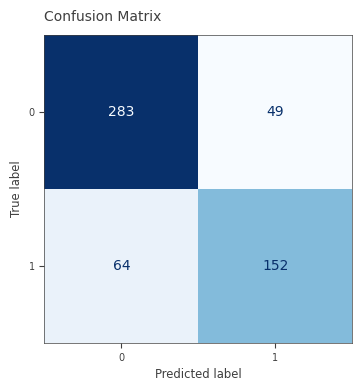

In [125]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()

ConfusionMatrixDisplay.from_estimator(
    model, X_train, y_train, sample_weight=None, 
    cmap='Blues', colorbar=False, ax=ax);

##### Style
ax.set_xlabel(ax.get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel(ax.get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
ax.set_title('Confusion Matrix', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax.spines[['left', 'right', 'bottom', 'top']].set_color('#3f3f3f')
ax.spines[['left', 'right', 'bottom', 'top']].set_linewidth('0.5')
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

In [126]:
results_df = pd.DataFrame({'actual': y_train,
                           'predicted': y_train_pred}) #Store results in a dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])

confusion_matrix

predicted,0,1
actual,,
0,283,49
1,64,152


In [127]:
report = classification_report(
    y_train, y_train_pred,
#     labels=None, target_names=None, sample_weight=None, digits=2, 
    output_dict=True
)

report = pd.DataFrame(report)
print('Classification Report')
report

# NB: support is the number of occurrences of each label in y_train

Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.815562,0.756219,0.793796,0.785890,0.792171
recall,0.852410,0.703704,0.793796,0.778057,0.793796
f1-score,0.833579,0.729017,0.793796,0.781298,0.792365
support,332.000000,216.000000,0.793796,548.000000,548.000000


In [128]:
auc_score = roc_auc_score(y_train, y_train_pred_proba['1'])

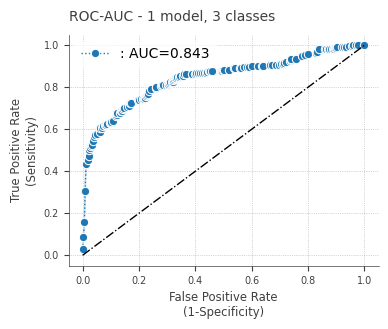

In [129]:
fig = plt.figure(figsize=(4, 3))
ax = plt.subplot()

fpr, tpr, thresholds = roc_curve(
    y_train,
    y_train_pred_proba['1'])
    
sns.lineplot(x=fpr, y=tpr, label=': AUC=' + str(round(auc_score,3)), ls=':', lw='1', marker='o', ax=ax)
sns.lineplot(x=[0, 1], y=[0, 1], label='', ls='-.', lw='1', color='black', ax=ax)

##### Style
ax.set_xlabel('False Positive Rate\n(1-Specificity)', loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel('True Positive Rate\n(Sensitivity)', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
ax.set_title('ROC-AUC - 1 model, 3 classes', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax.legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
ax.legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
ax.grid(axis="both", lw=0.5, ls=':')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

In [130]:
scores = pd.DataFrame()

precision, recall, threshold = precision_recall_curve(
    y_train,
    y_train_pred_proba['1']
)

scores['_threshold'] = threshold
scores['_precision'] = precision[:-1]
scores['_recall'] = recall[:-1]

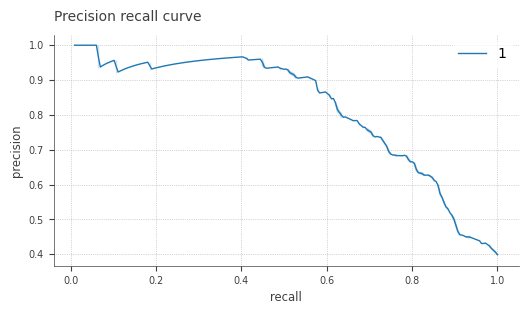

In [131]:
fig = plt.figure(figsize=(6, 3))
ax = plt.subplot()

sns.lineplot(x=scores['_recall'], y=scores['_precision'], label='1', ls='-', lw='1', ax=ax);

##### Style
ax.set_xlabel('recall', loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel('precision', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
ax.set_title('Precision recall curve', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax.legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
ax.legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
ax.grid(axis="both", lw=0.5, ls=':')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

###### Calibration

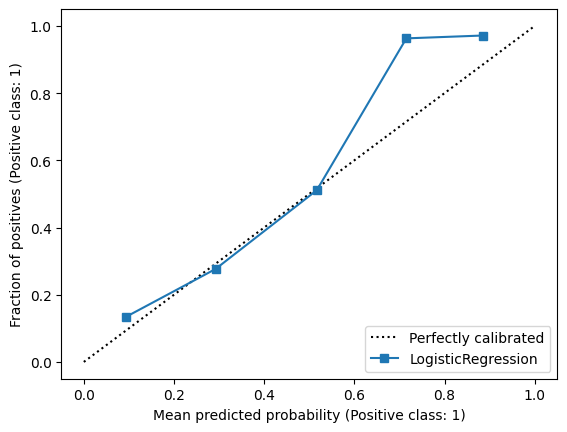

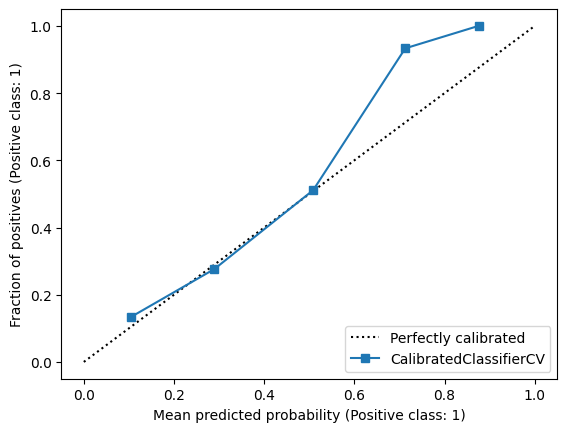

In [132]:
# Check the calibration of the model
disp_noncalibrated = CalibrationDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Calibrate
model_calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5).fit(X_train, y_train)
y_test_pred_proba_calibrated = pd.DataFrame(model_calibrated.predict_proba(X_test))
y_test_pred_proba_calibrated.columns = ['0', '1']

# Check the calibration of the calibrated model
disp_calibrated = CalibrationDisplay.from_estimator(model_calibrated, X_test, y_test)
plt.show()

In [133]:
# AUC before and after calibration
auc_score_noncalibrated = roc_auc_score(y_test, y_test_pred_proba['1'])
auc_score_calibrated = roc_auc_score(y_test, y_test_pred_proba_calibrated['1'])

print(f"AUC non calibrated: {auc_score_noncalibrated:0.4f}")
print(f"AUC calibrated: {auc_score_calibrated:0.4f}")

AUC non calibrated: 0.8800
AUC calibrated: 0.8811


##### Plot decision regions

In [58]:
from utils.plots import plot_decision_regions
plot_decision_regions(X_train, y_train, classifier=model)

ModuleNotFoundError: No module named 'utils'

### Loss

##### Loss Functions: <font color='blue'>Log-loss, Hinge, etc.</font>

**Log Loss** - for logistic Classifier
- Log Loss = Cross-Entropy Loss = Log Likelihood = Log of the combined probability
- Infinitely penalize wrong predictions

**Hinge** - For Vector Based Model

Depending on models:
- Squared_hinge
- Huber
- Modified huber
- perceptron
- squared_error
- epsilon_insensitive
- squared_epsilon_insensitive

### Linear models (parametric)

##### Initialization

In [134]:
# X_train, X_test, y_train, y_test = train_test_split(X_penguins, y_penguins, test_size=0.3, random_state=6)

# features_num = X_train.select_dtypes(exclude=['object']).columns
# imputer_num = SimpleImputer(strategy='mean').fit(X_train[features_num])
# X_train[features_num], X_test[features_num] = imputer_num.transform(X_train[features_num]), imputer_num.transform(X_test[features_num])
# scaler = RobustScaler().fit(X_train[features_num])
# X_train[features_num], X_test[features_num] = scaler.transform(X_train[features_num]), scaler.transform(X_test[features_num])

# features_cat = X_train.select_dtypes(include=['object']).columns
# imputer_cat = SimpleImputer(strategy='most_frequent').fit(X_train[features_cat])
# X_train[features_cat], X_test[features_cat] = imputer_cat.transform(X_train[features_cat]), imputer_cat.transform(X_test[features_cat])
# ohe = OneHotEncoder(sparse=False, drop='if_binary').fit(X_train[features_cat])
# X_train[ohe.get_feature_names_out()], X_test[ohe.get_feature_names_out()] = ohe.transform(X_train[features_cat]), ohe.transform(X_test[features_cat])
# X_train.drop(columns=features_cat, inplace=True), X_test.drop(columns=features_cat, inplace=True);

In [135]:
y_wine = X_wine['color_intensity']
X_wine.drop('color_intensity', axis=1, inplace=True)
y_wine = pd.cut(x = y_wine, 
                bins=[y_wine.min()-1, y_wine.mean(), y_wine.mean()*2, y_wine.max()+1], 
                labels=['0', '1', '2'])
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=6)

features_num = X_train.select_dtypes(exclude=['object']).columns
imputer_num = SimpleImputer(strategy='mean').fit(X_train[features_num])
X_train[features_num], X_test[features_num] = imputer_num.transform(X_train[features_num]), imputer_num.transform(X_test[features_num])
scaler = RobustScaler().fit(X_train[features_num])
X_train[features_num], X_test[features_num] = scaler.transform(X_train[features_num]), scaler.transform(X_test[features_num])

##### <font color='blue'>LogisiticRegression</font> - aka logit, MaxEnt classifier

Loss = Log-loss

In [136]:
model = LogisticRegression(
    # Model specificities
    class_weight=None,       # dict or ‘balanced’, default=None
    multi_class='auto',      # 'auto', 'ovr' (binary for each label) or 'multinomial' (multinomial loss fit)

    fit_intercept=True,
    intercept_scaling=1,    # ?
    
    # Loss & penalty
    penalty='l2',            # 'l2', 'l1', 'elasticnet', 'None'
    C=1,                     # Inverse of regularization strengh
    l1_ratio=None,
    
    # Solver
    max_iter=1000,
    solver = 'lbfgs',        # ‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, 'saga'
    tol=0.0001,
    random_state=None,
    warm_start=False,

    # Other hyperparameters
    n_jobs=-1,
    dual=False,
)

model.fit(X_train, y_train)
model.predict(X_test)
model.predict_proba(X_test);
model.score(X_test, y_test)      # mean accuracy

0.7962962962962963

#####  <font color='blue'>RidgeClassifier</font> - Classifier using Ridge regression

Loss = Log-loss

In [ ]:
model = RidgeClassifier(    
    # Model specificities
    class_weight=None,       # dict or ‘balanced’, default=None
    fit_intercept=True,

    positive=False,          # only for lbfgs solver

    # Loss & penalty
    alpha=1,                 # Constant of the L2 regularizer. alpha = 1 / (2C)

    # Solver
    solver='auto',           # 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'
    max_iter=None, 
    tol=0.0001,
    random_state=None, 
)

model.fit(X_train, y_train)
model.score(X_test, y_test)      # mean accuracy

#####  <font color='blue'>SGDClassifier</font> - Linear classifiers (SVM, logistic regression, etc.) with SGD training

In [ ]:
model = SGDClassifier(
    # Model specificities
    class_weight=None,             # dict {class_label: weight} or “balanced”, default=None
    fit_intercept=True, 

    # Loss & penalty
    loss='hinge',                  # 'hinge', ‘log_loss’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’, ‘squared_epsilon_insensitive’
    penalty='l2',                  # 'l2', 'l1', 'elasticnet', 'None'     alpha=0.0001, 
    alpha=0.0001, 
    l1_ratio=0.15, 
    epsilon=0.1,                   # only for loss huber & epsilon co

    # Solver
    max_iter=1000, 
    tol=0.001,
    eta0=0.0, 
    learning_rate='optimal', 
    power_t=0.5, 

    early_stopping=False, 
    validation_fraction=0.1, 
    n_iter_no_change=5, 
    
    warm_start=False, 
    average=False,
    
    shuffle=True,
    random_state=None,

    # Other hyperparameters
    n_jobs=-1, 
)

model.fit(X_train, y_train)
model.score(X_test, y_test)      # mean accuracy

##### See also

PassiveAggressiveClassifier

Perceptron

SGDOneClassSVM

##### Log odd visualisation

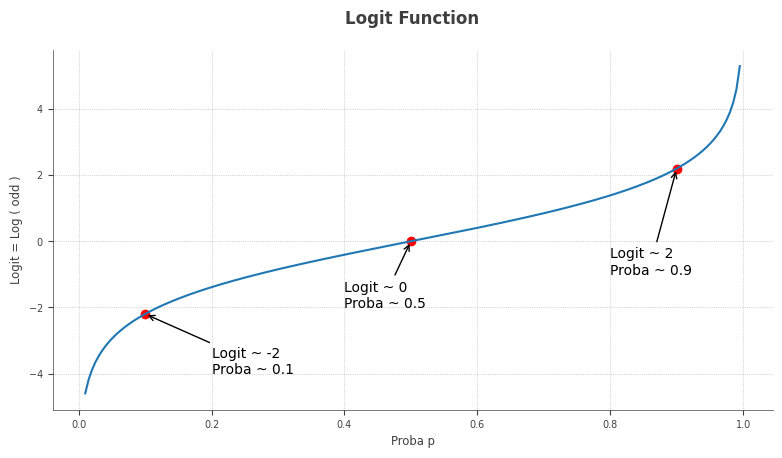

In [137]:
# Odds cruve
p = np.arange(0.01,1,0.005)
odds = p / (1-p)

fig = plt.figure(constrained_layout=False, figsize=(8,4))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)
ax = fig.subplots()
fig.suptitle('Logit Function', color='#3f3f3f', y=1.05, fontweight='bold', fontsize='large')


# log-odds = LOGIT
plt.plot(p, np.log(odds)); 
plt.scatter(0.9, np.log(0.9/(1-0.9)), c='red')
plt.scatter(0.5, 0, c='red')
plt.scatter(0.1, np.log(0.1/(1-0.1)), c='red')

ax.annotate('Logit ~ 2 \nProba ~ 0.9', (0.9, np.log(0.9/(1-0.9))), (0.8, -1), arrowprops={"arrowstyle":"->"})
ax.annotate('Logit ~ 0 \nProba ~ 0.5', (0.5, 0), (0.4, -2), arrowprops={"arrowstyle":"->"})
ax.annotate('Logit ~ -2 \nProba ~ 0.1', (0.1, np.log(0.1/(1-0.1))), (0.2, -4), arrowprops={"arrowstyle":"->"})


plt.xlabel('Proba p'); plt.ylabel('Logit = Log ( odd )')

ax.set_xlabel(ax.get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel(ax.get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

ax.grid(axis="both", lw=0.5, ls=':')
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

### Distance based models (non parametric)

#####  <font color='blue'>KNeighborsClassifier</font>

In [ ]:
model = KNeighborsClassifier(
    # Model specificities
    n_neighbors=5, 
    
    # Loss & penalty
    p=2,                       # 2 > euclidean distance, 1 > manhattan, p > Minkowski distance l_p
    weights='uniform',         # 'uniform', 'distance' or [callable]
    metric='minkowski',        # Metric to use for distance computation
    metric_params=None,        # Additional arguments for the metric function
    
    # Solver
    algorithm='auto',          # ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’
    leaf_size=30,              # used for ball_tree or kd_tree
    
    # Other hyperparameters
    n_jobs=-1,
)

model.fit(X_train, y_train)
model.score(X_test, y_test)      # mean accuracy

### Support vector models (non parametric)

##### Description

**Maximum Margin Classifier algorithm**
- Find the furthest hyperplane from all the points. Maximizes the margin
- Observations on the margin boundary are the support vectors
- Super sensitive to outliers. Overfits the training data
- Assez rare

**Soft Margin Classifier**
- A few points are misclassified
- Penalty = "how far" on the wrong side of the **margin**
- **Hinge loss** (linear, like the MAE)
- The higher **C**, the stricter the margin. Inverse of the regularization, similar to 1 / alpha in Ridge


##### <font color='blue'>SVC</font>

Loss = Hinge + l2 / C

Kernel (sort of similarity function): simulate feature mapping / creation by wisely replacing the Kernel of the Loss Function

- **linear**
- **poly** (of dimension degree)
- **rbf** (radial basis function) of coeff gamma, aka **Gaussian**
- **sigmoid**, of coeff gamma

SVC(kernel='linear', C=10)   <=>    SGDClassifier(loss='hinge', penalty='l2', alpha=1/10)

In [ ]:
model = SVC(
    # Model specificities
    kernel='rbf',         # 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or callable
    degree=3,             #  only for kernel = poly
    gamma='scale',        # 'scale' or 'auto'. Kernel coeff for rbf, poly and sigmoid
    coef0=0,              # independant term in kernel function - only for poly and sigmoid
    cache_size=200,       # Size of the Kernel Cache

    decision_function_shape='ovr',  # ?
    break_ties=False,               # ?

    probability=False,    # ? predict_proba might be inconsistent with predict

    # Loss
    C=1,                  # Inversely proportional to the strength of regul. Penalty = l2 
    class_weight=None,    # Weight the C per class
    
    # Solver
    tol=0.001, 
    max_iter=-1,
    shrinking=True,                 # ?
    random_state=None,              # ?
    
    # Other hyperparameters
)

model.fit(X_train, y_train)
model.score(X_test, y_test) # mean accuracy

##### See also

- LinearSVC
- NuSVC

### Decision trees

##### Decision Trees

Loss = ?

Solver = Binary decision at each step, without reconsidering the previous choice. Can fall into minimum local. The root node is not necessarly the better. It overfits rapidely with the number of nodes (determined by max_depth or max.. or min..)

Gini index = 1 - sum proba² = impurity of each node, the lower the better.

Root node > Internal node > Leaf.

Pro: no scaling necessary, resistant to outliers, intuitive and easy to interpret, allow for feature selection, non linear modeling

Con: high variance, long training time, splits data 'orthogonally' to features (> PCA)

Trees are note calibrated classifiers (predict proba is not really a proba). "Orthogonal" classifiers (orthogonal aux features).

In [138]:
model = DecisionTreeClassifier(
    # Choose between :
    max_depth=2,                # None by default > until all leaves are pure or contain less than min_samples_split   
#     min_samples_split=500,             # min for a node 
#     min_samples_leaf=500,                # min size of the leaf

    random_state=2,
)

model.fit(X_train , y_train)
model.score(X_test, y_test)
            
# predict proba is not a proba, it is the ratio of classes in the node.

0.7592592592592593

In [139]:
feature_importance = pd.DataFrame({'feature': X_test.columns, 
                                   'importance': model.feature_importances_})

feature_importance.sort_values(by='importance', ascending=False)              

,feature,importance
9,hue,0.426681
0,alcohol,0.417560
6,flavanoids,0.155759
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
7,nonflavanoid_phenols,0.000000
8,proanthocyanins,0.000000


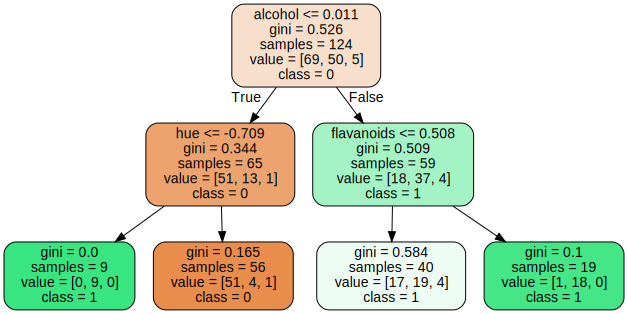

In [140]:
export_graphviz(
    model, 
    out_file="tree.dot", 
    feature_names=X_train.columns,
    class_names=['0','1','2'], 
    rounded=True, 
    filled=True
)

with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### Bagging (similar models in parallel)

##### Overview on bagging

Weak learners are trained, in parallel, on boostrapped (with replacement) samples of the dataset. Predictions are voted by the weak_learners

Pro:
- reduce variance (overfitting !)
- can be applied to any model

Con:
- Complex structure
- Long training time
- Disregards the perf of individual sub models

##### <font color='blue'>Bootstrap Agregating</font> (on any model)

In [141]:
# weak_learner = KNeighborsClassifier(n_neighbors=3)
weak_learner = LogisticRegression()

model = BaggingClassifier(
    weak_learner, 
    n_estimators=40,
    oob_score=True,                 # Out of bag score, on data that has not be seen.
)

model.fit(X_train, y_train)
model.score(X_test, y_test)
model.oob_score_

0.7741935483870968

##### <font color='blue'>Random Forest</font> (bagging on decision tree)

Good practice: lots of trees with low depth

In [142]:
model = RandomForestClassifier(
    n_estimators=50,
    
    # Choose between :
    max_depth=2,                # None by default > until all leaves are pure or contain less than min_samples_split   
#     min_samples_split=500,             # min for a node 
#     min_samples_leaf=500,                # min size of the leaf

)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8148148148148148

### Boosting (similar models sequentially)

##### Overview on boosting

Weak learners are trained, sequentially, with a focus (more weights given to) on bad predictions of the previous weaklearners

Pros: 
- Strong sub-models have more influence in final decision
- Reduces bias

Cons:
- Computationally expensive (sequential)
- Easily overfits (except XGBoost which use a val to prevent overfitting)
- Sensitive to outliers (too much time spent trying to correctly predict them)

##### <font color='blue'>Adaptative Boosting</font> (most often on decision tree)

In [143]:
model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
)
    
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7777777777777778

##### <font color='blue'>Gradient Boosting</font> (always on tree)

An exclusiv focus on bad predictions for the following weak learners (tree)

In [144]:
model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7777777777777778

##### <font color='blue'>XGBoost</font> (always on tree, not in sklearn, but compatible)

Use a val dataset to prevent overfitting

When put in a sklearn pipeline, it does not prevent the overfitting with the val set

In [1]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=6)

model = XGBClassifier(
    max_depth=4,
    n_estimators=100,
    learning_rate=0.1,
    early_stopping_rounds=5
)

model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_val, y_val)],
         )

NameError: name 'train_test_split' is not defined

### Stacking different models

##### Simple agregating voting

Different learners vote

In [146]:
model = VotingClassifier(
    estimators = [("rf", RandomForestClassifier()),
                  ("lr", LogisticRegression())],
    voting = 'soft', # to use predict_proba of each classifier before voting. Hard = majority
    weights = [1, 1] # to equally weight forest and logreg in the vote
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7962962962962963

##### Multi-layer stacking with a meta learner

In [147]:
# Multi-layer stacking
model = StackingClassifier(
    estimators = [("rf", RandomForestClassifier()),
                  ("knn", KNeighborsClassifier(n_neighbors=10))],
    final_estimator = LogisticRegression()) # meta learner

model.fit(X_train, y_train)
model.score(X_test, y_test)

/home/laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.8333333333333334

### Incremental learning

- sklearn.naive_bayes.MultinomialNB
- sklearn.naive_bayes.BernoulliNB
- sklearn.linear_model.Perceptron
- sklearn.linear_model.SGDClassifier
- sklearn.linear_model.PassiveAggressiveClassifier

## Solver & penalty

### **Solver** (optimizer in deep learning)

#### Iterativ solvers:

##### <font color='blue'>Gradient descent</font>

- Partial derivativ of the Loss function
- Step size = eta * partial derivativ
    - Learning Rate = eta
    - Steps become smaller close to the minimum, this is why GD is efficient
- Epoch = 1 step
- Stopping criteria
    - Minimum Step Size
    - Maximum number of steps

##### <font color='blue'>Mini-Batch Gradient descent</font>

Compute an approximate loss (on a mini-bath of observations) at each step


##### <font color='blue'>SGD</font> - Stochastic Gradient Descent

Mini-batch of size 1

Less stable, the loss fluctuates from epoch to epoch, steps to the minimum are less direct

Pro: 
- Faster for large dataset
- Jumps out of local minima
- Reduces RAM load

Con:
- More epochs
- Never exactly converges (carefull when to stop)
- Slower for small datasets with many features

##### Enhanced Gradient Descent: <font color='blue'>Momentum, AdaGrad, RMSProp, Adam</font>

Momentum: adds inertia

AdaGrad: adaptative eta per feature, prioritize weakly updated params

RMSProp: adds decay, only recent gradient matters

Adam: all combined

##### Second-Order Partial Derivative Methods: <font color='blue'>Newton, L-BFGS / ~Hessian</font>

Newton

L-BFGS, approximation of Hessian

Pro: converges with far fewer epochs
Cons: computationally expensive

##### see also

‘svd’ - Singular Value Decomposition

‘cholesky’ - standard scipy.linalg.solve

‘sparse_cg’ - conjugate gradient solver as found in scipy.sparse.linalg.cg

‘lsqr’ - dedicated regularized least-squares routine scipy.sparse.linalg.lsqr

‘sag’ - Stochastic Average Gradient descent

‘saga’ - Stochastic Average Gradient descent improved, unbiased version named SAGA

‘lbfgs’ - scipy.optimize.minimize

#### Non iterativ solvers:

- Matrix inversion (for small p)
- Singular Value Decomposition

### Penalty

##### Penalty: <font color='blue'>l1, l2, elasticnet or none </font>

Penalize big beta, but not beta0 (it does not regularized the intercept)

**Ridge** reduces the influence of features with a non-significant coefficient, but will not shrink them to 0. It has no impact on the intercept. (Tends to penalize features that are note statistically significant). 

l2 = sum beta squared

**Lasso** shrinks the influence of (some) features to zero. It can be used as a feature selection tool. It has no impact on the intercept. (Tends to penalize features that are note statistically significant).

l1 = sum abs beta 

**ElasticNet** 

alpha * ( gamma * l1 + (1-gamma) * l2 )        with gamma = l1_ratio

# Unsupervised model

## Dimensionality reduction

##### initialisation

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.3)
scaler = StandardScaler().fit(X_train)
X_train[X_train.columns], X_test[X_test.columns] = scaler.transform(X_train), scaler.transform(X_test)

#### Principal Component Analysis <font color='blue'>PCA</font>

Eigenvalues, Eigenvectors

Linear

If data is not centered, it will automatically centered it (but not scaled it). So it is a good practice to do it before to avoid confusion and mistakes
> model.transform(X) = np.dot(X - X.mean(axis=0), model.components_.T)

In [149]:
model = PCA(
    n_components=None,       # Nb of component to keep
)
model.fit(X_train)

PC = pd.DataFrame(model.components_.T,
                 index=X_train.columns,
                 columns=[f'PC{i}' for i in range(1, len(model.components_)+1)])

# PC are in order of variance explanation
PC

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
alcohol,-0.150481,-0.526944,-0.290226,-0.259577,-0.105418,-0.011473,0.240317,-0.376285,0.555974,-0.106025,-0.123038,0.044724
malic_acid,0.256151,-0.280420,-0.068515,-0.434714,0.521128,-0.072966,-0.560157,-0.131482,-0.166626,-0.068479,0.146395,0.015309
ash,0.035915,-0.418901,0.590816,-0.066209,-0.267400,-0.198952,0.001649,0.185260,-0.169748,-0.505806,-0.181016,-0.083401
alcalinity_of_ash,0.252282,-0.014668,0.616194,-0.027639,0.089478,-0.109187,0.223762,-0.458490,0.083880,0.492673,0.123497,0.102249
magnesium,-0.141807,-0.409825,0.132386,0.690527,0.244216,0.180706,-0.340121,0.121003,0.265466,0.152876,-0.025111,0.022042
total_phenols,-0.390690,-0.047254,0.180723,-0.264342,0.099420,-0.001991,0.099888,0.343990,0.217617,0.124564,0.582013,-0.450314
flavanoids,-0.419941,0.042920,0.144054,-0.177261,0.099109,-0.048857,-0.000437,0.205143,0.027978,-0.015582,0.100260,0.839204
nonflavanoid_phenols,0.311128,-0.033988,0.108947,-0.320859,-0.383510,0.584737,-0.241237,0.312392,0.229203,0.259186,-0.123988,0.085782
proanthocyanins,-0.313221,0.000220,0.164482,-0.088551,0.326554,0.694528,0.231701,-0.245334,-0.295106,-0.167982,-0.190278,-0.112274
hue,-0.299962,0.305798,0.150829,0.035580,-0.374091,0.064124,-0.537063,-0.497346,0.135880,-0.224859,0.203297,-0.047901


In [150]:
X_train_proj = pd.DataFrame(
    model.transform(X_train), 
    columns=[f'PC{i}' for i in range(1, len(model.components_)+1)])
X_train_proj.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-3.505148,-0.852968,-1.253372,-1.678834,-1.045010,2.085802,0.157367,-0.037998,0.057176,-1.298967,0.063534,0.339829
1,-0.713671,2.029222,0.042481,-0.434854,1.258386,-0.220009,-0.431282,-0.289846,-0.058510,-0.864366,-0.265802,-0.388482
2,3.200968,-2.189403,0.830693,-1.206417,-0.100056,0.454945,0.449718,-0.179953,0.712930,-0.270567,0.061492,-0.176793


##### Heatmap before and after

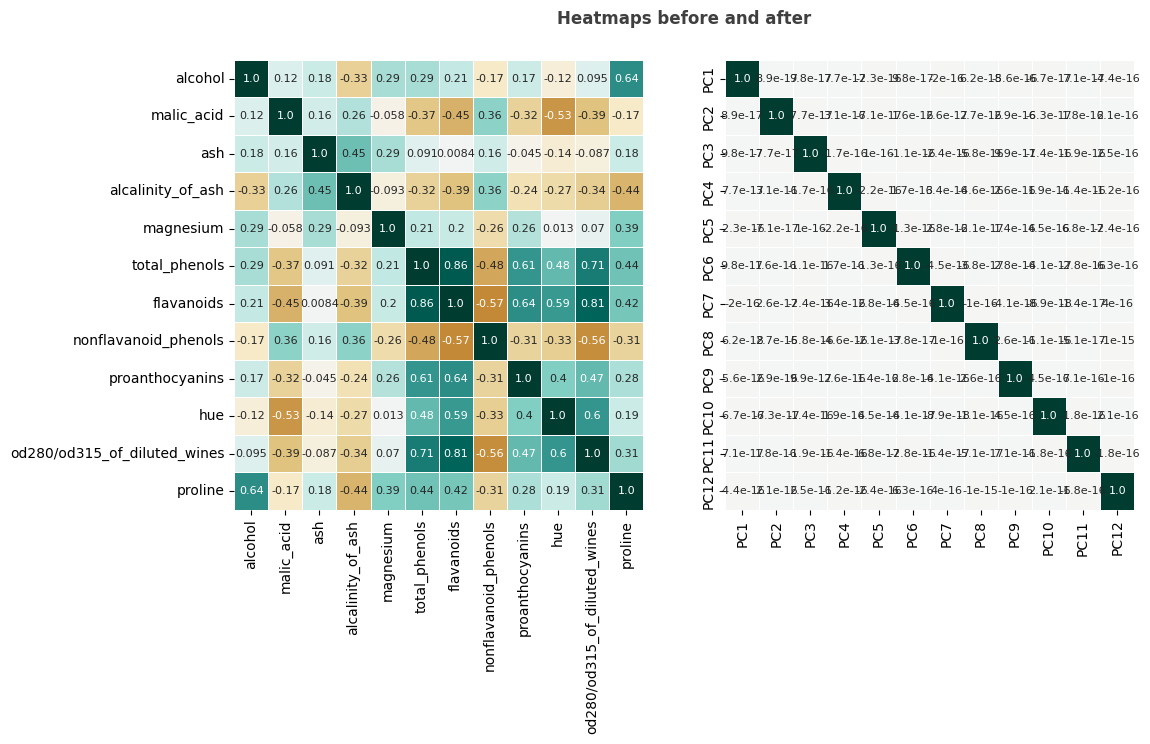

In [151]:
##### Figure
mosaic_str = '''AB
                AB
                '''
mosaiq_li = ['A', 'B']
fig = plt.figure(constrained_layout=False, figsize=(10,5))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)
ax = fig.subplot_mosaic(mosaic_str)
fig.suptitle('Heatmaps before and after',color='#3f3f3f', y=1.05, fontweight='bold', fontsize='large')

sns.heatmap(X_train.corr(),
            vmin=-1, vmax=1, 
            cmap='BrBG',
            annot=True, fmt='.2',
            annot_kws = {"fontsize":8},
            square=False, cbar=False, cbar_kws=dict(orientation='vertical'),
            linewidths=0.5, linecolor='w',
            ax=ax['A']);

sns.heatmap(X_train_proj.corr(),
            vmin=-1, vmax=1, 
            cmap='BrBG',
            annot=True, fmt='.2',
            annot_kws = {"fontsize":8},
            square=False, cbar=False, cbar_kws=dict(orientation='vertical'),
            linewidths=0.5, linecolor='w',
            ax=ax['B']);

##### Elbow method

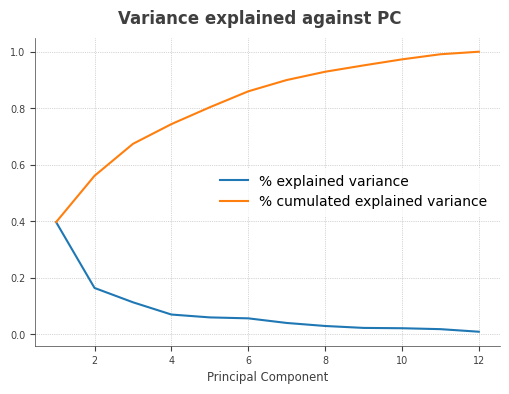

In [152]:
fig = plt.figure(constrained_layout=False, figsize=(6,4))
ax = fig.subplots()
fig.suptitle('Variance explained against PC',color='#3f3f3f', y=0.95, fontweight='bold', fontsize='large')

sns.lineplot(x = range(1,  len(model.components_)+1), y = model.explained_variance_ratio_, label='% explained variance')
sns.lineplot(x = range(1,  len(model.components_)+1), y = np.cumsum(model.explained_variance_ratio_), label='% cumulated explained variance')

##### Style
ax.set_xlabel('Principal Component', loc='center', color='#3f3f3f', fontsize='small')
ax.set_ylabel('', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
ax.grid(axis="both", lw=0.5, ls=':')
ax.legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
ax.legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

#### See also

- KernelPCA   >>    Captures non-linear patterns
- t-Distributed Stochastic Neighbor Embedding (t-SNE) 



- DictionaryLearning
- FactorAnalysis
- FastICA
- IncrementalPCA
- LatentDirichletAllocation
- MiniBatchDictionaryLearning
- MiniBatchDictionaryLearning
- MiniBatchSparsePCA
- NMF
- MiniBatchNMF
- SparsePCA
- SparseCoder
- TruncatedSVD

## Clustering

##### <font color='blue'>K-Means</font> Algorithm

Distance based model

Often after a PCA

Use MiniBatchKmeans if you have a lot of data

Loss = MSE

In [153]:
model = KMeans(n_clusters=3)
model.fit(X_train_proj)

model.cluster_centers_
model.labels_

array([2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 0,
       0, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 1,
       1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 0,
       0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 2], dtype=int32)

/home/laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


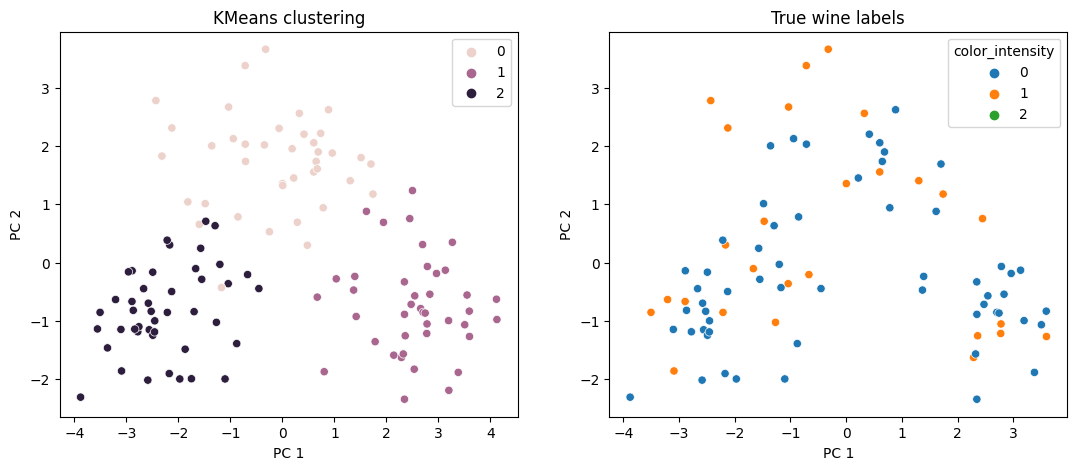

In [165]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.scatterplot(X_train_proj.iloc[:,0], X_train_proj.iloc[:,1], hue=model.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

plt.subplot(1,2,2)
sns.scatterplot(X_train_proj.iloc[:,0], X_train_proj.iloc[:,1], hue=y_train)
plt.title('True wine labels'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

<font color='red'> Une question de score a creuser avec make scorer</font>

In [166]:
from sklearn.metrics import accuracy_score

y_pred = pd.Series(km.labels_).map({0:0, 1:2, 2:1}) # WARNING: change this manually!
accuracy_score(y_pred, y)

NameError: name 'km' is not defined

##### Elbow method  > to find the best k

Text(0.5, 0, 'k cluster number')

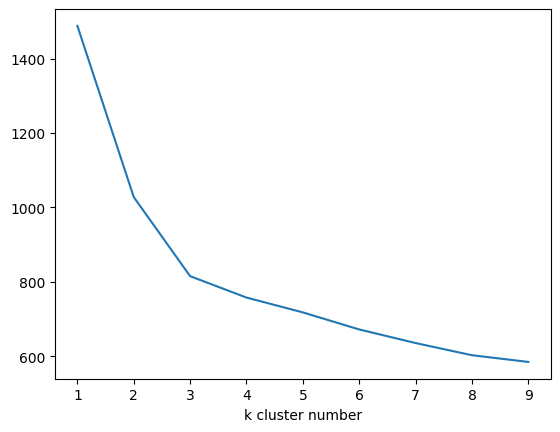

In [167]:
inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_train_proj)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

#####  Hierarchical Clustering: <font color='blue'>Linkage</font>

Hierarchical clustering is considered greedy, meaning that it is likely to yield a local optima and miss the big picture

([], [])

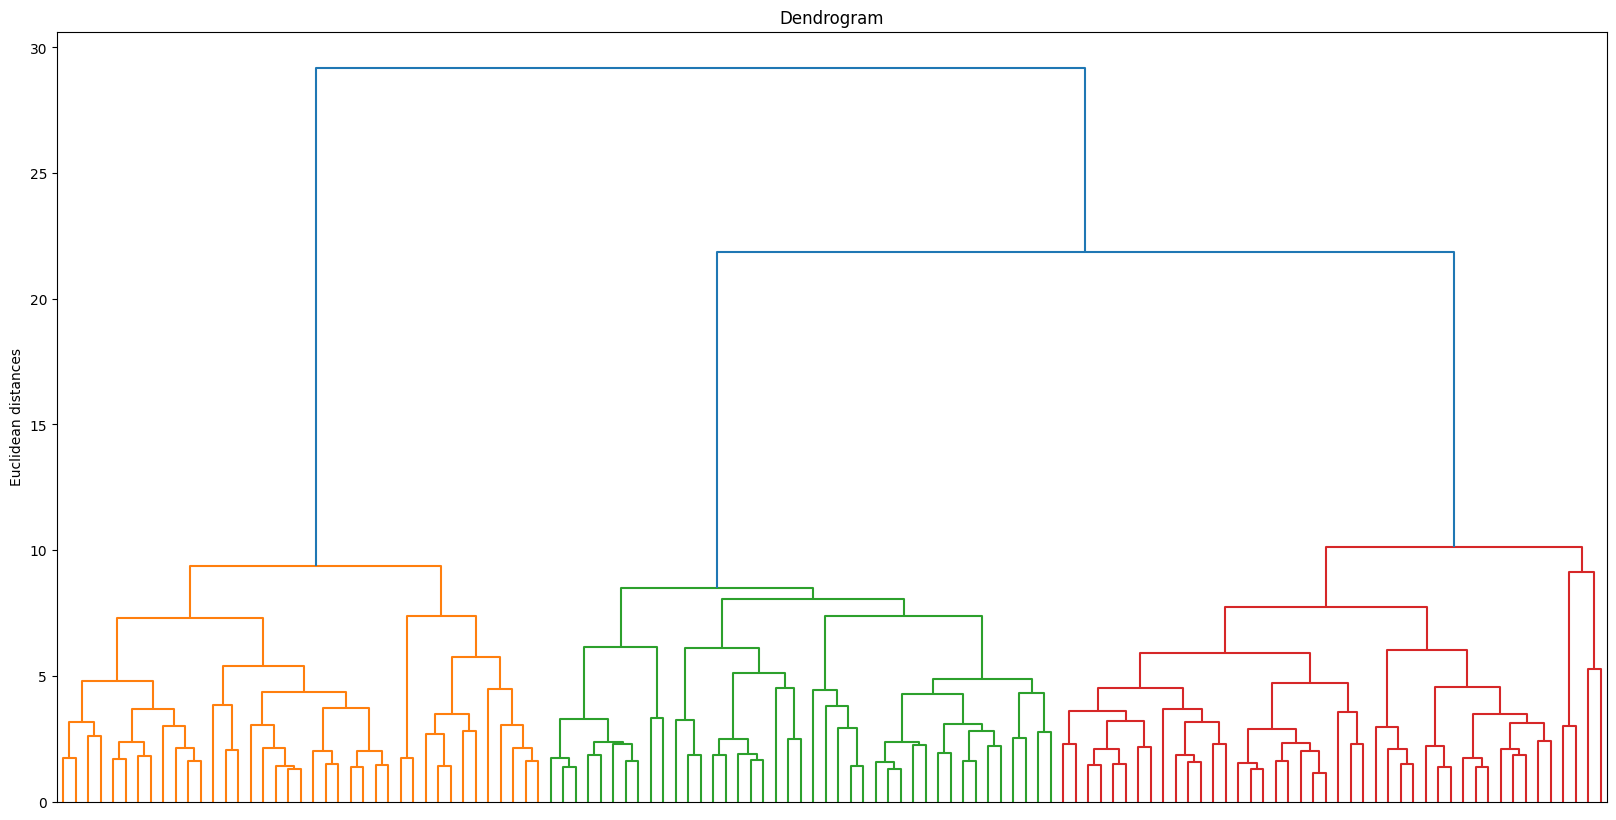

In [168]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z_train = linkage(
    X_train, 
    method='ward', 
    metric='euclidean', 
    optimal_ordering=False)

plt.figure(figsize=(20, 10))
dendrogram(Z_train, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.xticks([])

##### See Also:

- AffinityPropagation
- AglomerativeCLustering
- Birch
- DBSCAN
- HBDSCAN
- FeatureAgglomeration
- BisectionKMeans
- MiniBatchKMeans
- MeanShift
- OPTICS
- SpectralClustering
- SpectralBiclustering
- SpectralCoclustering

## Incremental learning

**Clustering**
- sklearn.cluster.MiniBatchKMeans

**Decomposition / feature Extraction**
- sklearn.decomposition.MiniBatchDictionaryLearning
- sklearn.cluster.MiniBatchKMeans

# Time series

##### Initialisation

In [ ]:
data_electric = pd.read_csv('./time_series_data/Electric_Production.csv')
data_electric['DATE'] = pd.to_datetime(data_electric['DATE'], infer_datetime_format=True)
data_electric.columns = ['date', 'value']
data_electric.set_index(['date'], inplace=True)

**Train_test_split**

In [ ]:
index = round(0.7 * data_electric.shape[0])

y_train = data_electric.iloc[:index]
y_test = data_electric.iloc[index:]

## Stationarity

##### Stationarity - <font color='blue'>Augmented Dickey Fuller - ADF</font>

Augmented Dickey Fuller - ADF, test of stationarity > p-value > should be < 0.05

In [ ]:
adfuller(y_train)[1]

Stationarity : do not exhibit meaningful statistical changes over time:
- Mean: stable over time (if not it is said unit root)
- Variance: stable over time
- Autocorrelation: cov with its lagged terms stable

##### Achieve stationarity

- Decomposition : trend + season + resid and predict resid
- Differencing : Y(t) - Y(t-1)
- Tranformation log(y), etc.
- Or any combinaison of the previous 3

##### **Box-Jenkins method**

https://people.duke.edu/~rnau/arimrule.htm
- diff still has positive ACF terms > slight under-differencing > p
- diff have negative ACF terms > slight over-differenced > MA terms > q

**AR coeff and behavior**

<font color='blue'>Stationary</font>: sum of AR < 1

<font color='blue'>Growing mean</font>: AR1 or sum or AR very close to 1 (additive AR terms)
- de-trend
- difference the time series

<font color='blue'>Exponential behavior</font>: AR coefficients > 1
- use a log-transformation to remove 
- (or) add a negative AR(2) term

<font color='blue'>Oscillation of the ACF / PACF</font>: des termes AR positifs et negatifs se contredisent 

<font color='blue'>Stickiness</font>: time series staying at a given level for a period of time: AR(1) > 0. auto-regressivity

<font color='blue'>Seasonality</font>: Significant terms at higher lags

AR(1)=0 ➔ white noise

0<AR(1)<1 ➔ "sticky" time series regressing to the mean

AR(1)=1 ➔ random walk/linear trend

AR(1)>1 ➔ exponential trend

AR(1)<0 ➔ oscillations

AR(1)<−1 ➔ exponential oscillations

##### Seasonal decomposition > via statsmodels

In [ ]:
result_add = seasonal_decompose(
    y_train, 
    model='additive'             # 'additive', 'multiplicative'
)
result_add.plot();

##### Seasonal decomposition > manually

In [ ]:
# Use rolling mean to smooth our data (decompose uses a filter for trend)
y_train_decomposed=pd.DataFrame()
y_train_decomposed["trend"] = y_train["value"].rolling(12).mean()
y_train_decomposed["trend"].fillna(method='bfill', inplace=True)

# Divide our original 'value' by the monthly mean
y_train_decomposed["trend_stripped"] = y_train["value"] / y_train_decomposed["trend"]

# Group the remainder by month and take the mean for each month
monthly_means = y_train_decomposed.groupby(y_train.index.month)[["trend_stripped"]].mean().reset_index()
monthly_means.columns = ["month", "monthly_value"]

# Add these values back onto our original DataFrame
y_train_decomposed["month"] = y_train_decomposed.index.month
joined = y_train_decomposed.reset_index().merge(monthly_means, on = "month")

# Divide our values one more time by our monthly component
joined["residuals"] = joined["trend_stripped"] / joined["monthly_value"]
joined.set_index("date", inplace = True)

In [ ]:
adfuller(joined["residuals"])[1]

In [ ]:
mosaic_str = '''AB
                CD
                '''
mosaiq_li = ['A', 'B', 'C', 'D']
fig = plt.figure(constrained_layout=False, figsize=(10,4))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)
ax = fig.subplot_mosaic(mosaic_str)
fig.suptitle('Seasonal decomposition',color='#3f3f3f', y=1.05, fontweight='medium', fontsize='large')

y_train.plot(ax=ax['A'], label='trend');
joined['trend'].plot(ax=ax['B'], label='trend');
joined['monthly_value'].plot(ax=ax['C'], label='monthly_value');
joined['residuals'].plot(ax=ax['D'], label='residuals');

##### Style
for i in mosaiq_li:
    ax[i].set_xlabel(ax[i].get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
    ax[i].set_ylabel(ax[i].get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
    ax[i].grid(axis="both", lw=0.5, ls=':')
    ax[i].legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
    ax[i].legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

##### Differenciation

In [ ]:
# Differenciation d'ordre 1 > saisonnalité 
.diff(1)               # decalle d'1 mois
.diff(12)              # decalle de 12 mois

# Differenciation d'ordre 2 > notion d'accélération 
.diff(1).diff(1)

In [ ]:
adfuller(y_train.diff(12).dropna())[1]

In [ ]:
mosaic_str = '''AA
                BC
                DE
                '''
mosaiq_li = ['A', 'B', 'C', 'D', 'E']
fig = plt.figure(constrained_layout=False, figsize=(10,4))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.7)
ax = fig.subplot_mosaic(mosaic_str)
fig.suptitle('Differentiation',color='#3f3f3f', y=1.05, fontweight='medium', fontsize='large')

diff_1 = y_train.diff(1).dropna()
diff_1_1 = y_train.diff(1).diff(1).dropna()
diff_12 = y_train.diff(12).dropna()
diff_12_12 = y_train.diff(12).diff(12).dropna()

y_train.plot(ax=ax['A']);
diff_12.plot(ax=ax['B']);
diff_12_12.plot(ax=ax['C']);
diff_1.plot(ax=ax['D']);
diff_1_1.plot(ax=ax['E']);

ax['A'].set_title('Value', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax['B'].set_title('1st Order Differencing - 1 period', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax['C'].set_title('2nd Order Differencing - 1 period', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax['D'].set_title('1st Order Differencing - 12 periods', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax['E'].set_title('2nd Order Differencing - 12 periods', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})

##### Style
for i in mosaiq_li:
    ax[i].set_xlabel('', loc='center', color='#3f3f3f', fontsize='small')
    ax[i].grid(axis="both", lw=0.5, ls=':')
    ax[i].legend(loc='best', fontsize='small', labelcolor='#3f3f3f')
    ax[i].legend().get_frame().set(visible=True, facecolor='w', edgecolor='w', linewidth=1, alpha=0.7)
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

## Metrics, scoring and performance metrics

##### <font color='blue'>ACF</font> / <font color='blue'>PACF</font>

ACF (used for MA): 
- correlation of the series with itself
- Non isolated influence of specific time lags

PACF (used for AR):
- Multivariate linear regression
- It remove intermediary correlations
- Partial coeff > isolated influence of specific time lags
- On s'arrete dès qu'on rentre dans le col bleu, même si on ressort après

In [ ]:
mosaic_str = '''AB
                CD
                '''
mosaiq_li = ['A', 'B', 'C', 'D']
fig = plt.figure(constrained_layout=False, figsize=(10,4))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.6)
ax = fig.subplot_mosaic(mosaic_str)
fig.suptitle('ACF and PACF',color='#3f3f3f', y=1.05, fontweight='medium', fontsize='large')

plot_acf(y_train, lags=30, ax=ax['A']);
plot_pacf(y_train, lags=30, ax=ax['B'], color='r', method='ywm');
plot_acf(y_train.diff(12).dropna(), lags=30, ax=ax['C']);
plot_pacf(y_train.diff(12).dropna(), lags=30, ax=ax['D'], color='r', method='ywm');

ax['C'].set_title('on .diff(12)', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax['D'].set_title('on .diff(12)', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})

##### Style
for i in mosaiq_li:
    ax[i].set_xlabel(ax[i].get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
    ax[i].set_ylabel(ax[i].get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)
    ax[i].grid(axis="both", lw=0.5, ls=':')
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')
    

##### <font color='blue'>AIC</font>, Akaike Information Criterion

On regarde AIC et P-value

AIC = 2k - 2log(Likelihood)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
axs.plot(df['linearized'], label='linearized')

plot_predict(arima, start=1, end=250, 
             dynamic=False, # if true, it take only the first x% of the value to predict the following ones
             ax=axs
            );

forecast_results = arima_model1.get_forecast(len(y_test))
forecast_results.predicted_mean
forecast_results.conf_int()

##### Check Residuals for inference validity

##### Performance metrics

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import acf

def forecast_accuracy(y_pred: pd.Series, y_true: pd.Series) -> float:
    
    mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))  # Mean Absolute Percentage Error
    me = np.mean(y_pred - y_true)             # ME
    mae = np.mean(np.abs(y_pred - y_true))    # MAE
    mpe = np.mean((y_pred - y_true)/y_true)   # MPE
    rmse = np.mean((y_pred - y_true)**2)**.5  # RMSE
    corr = np.corrcoef(y_pred, y_true)[0,1]   # Correlation between the Actual and the Forecast
    mins = np.amin(np.hstack([y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)]), axis=1)
    maxs = np.amax(np.hstack([y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(y_pred-y_true, fft=False)[1]                      # Lag 1 Autocorrelation of Error

    forecast = ({
        'mape':mape,
        'me':me,
        'mae': mae,
        'mpe': mpe,
        'rmse':rmse,
        'acf1':acf1,
        'corr':corr,
        'minmax':minmax
    })

    return forecast

##### Manual cross validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

tscv = TimeSeriesSplit(n_splits=5, max_train_size=85, test_size=15, gap=0)

score=[]

for i, (train_index, test_index) in enumerate(tscv.split(y)):
    y_train = y[train_index]
    y_test = y[test_index]
    
    arima_model_cv = ARIMA(
        y_train,
        order=(0, 2, 3)
    )
    arima_model_cv = arima_model_cv.fit()
    forecast_results = arima_model_cv.get_forecast(len(y_test))
    score.append(forecast_accuracy(forecast_results.predicted_mean, y_test)['mape'])

np.mean(score)

## Models

##### Introduction: AR, MA and ARMA

<font color='blue'>**AR**</font> (auto regressive processes)

<font color='blue'>**MA**</font> (auto regressive processes)

MA processes are always stationary

Capture un comportement plus dynamique, shocks to not propagade far into the future

- Modeling a linear combination of consecutive random errors/ shocks 
- Does not depend on past Y values
- Tends to stay around average value 
- Any "random shock" will only have a very limited time effect of duration q (contrary to AR processes)

<font color='blue'>**ARMA**</font>, Auto Regressive Moving Average

-  <font color='blue'>PACF > AR > p </font> points above the confidence interval
Because AR processes are long term, we need to take the isolated impact

- <font color='blue'>ACF > MA > q </font>points above the confidence interval (deal with how errors propagate)
Becase MA processes are short term, we can take the autocorrelation

**Generate an ARMA process**

In [ ]:
ar_params = np.array([.55, - 0.35]) # beta        # nb: for MA process, ar_params = np.array([1])
ma_params = np.array([.65, .95]) # phi            # nb: for AR process, ma_params = np.array([0])

ar = np.r_[1, -ar_params] # add zero-lag and negate (this is how ArmaProcess needs to be coded)
ma = np.r_[1, ma_params] # add zero-lag
arma_process = ArmaProcess(ar, ma)
y = arma_process.generate_sample(200)

##### <font color='blue'>ARIMA</font> - Auto Regressive Integrated Moving Average

hypothesis: stationary

The AR process is simply a linear combination of p lags
- a one time "shock" will propagate far into the future
- not necessarily stationary

The MA process is a linear combination of q "random shocks"
- any "shock" will have a limited time effect
- always stationary

The I differencing predicts Y(d) instead of Y
- Differentiate until stationary
- 💡 differencing tends to turn AR processes into MA ones
- An GDP growth "shock" may not propagate long term but a "GDP shock" will !

In [ ]:
model = ARIMA(
    y 
    order=(2, 1, 1),               # (p, d, q)
    trend='t')

model = model.fit()
model.summary()

GridSearch the hyperparameters p, d, q

In [ ]:
import pmdarima as pm

model = pm.auto_arima(
    y, 
    start_p=0, start_q=0,
    max_p=3, max_q=3, # maximum p and q
    d = None,          # no diff
    seasonal=False                    # no seasonality
)   

model.summary()

##### <font color='blue'>SARIMA</font> - Seasonal Arima

SARIMA(p,d,q)(P,D,Q)[m]

Critères de saisonnalités : .diff(m) > jusqu'a un adfuller < 0.05
- m ~ la periode de saisonnalité
- D ~ Integration hyperparameter for seasonal lag level >> (combien de .diff(m))

- P ~ AR hyperparameter for seasonal lag level >> decide with auto_arima
- Q ~ MA hyperparameter for seasonal lag level  >> decide with auto_arima


Ce qu'on observe en local, après avoir enlevé la saisonnalité, après le .diff(m)
- p ~ AR hyperparameter for individual lag level
- d ~ Integration hyperparameter for individual lag level
- q ~ MA hyperparameter for individual lag level

In [ ]:
import pmdarima as pm

model = pm.auto_arima(
    df_train, 
    start_p=0, max_p=2, 
    max_d=1, 
    start_q=0, max_q=2,
    start_P=0, max_P=2,
    seasonal=True, 
    m=12,
    max_D=1, 
    start_Q=0, max_Q=2, 
    trace=True, 
    error_action='ignore', 
    suppress_warnings=True,
    njobs=-1
)

print(model.summary())

##### <font color='blue'>SARIMAX</font> - avec critères exogènes

uses an external time series to help predict our main time series e.g. using weather forecast to predict energy prices

In [ ]:
model = SARIMAX(
    y_train, 
    order=(0, 1, 1), 
    seasonal_order=(2, 0, 2, 12)
)

model = model.fit(maxiter=75)
model = model.summary()

# Forecast
results = model.get_forecast(len(y_test), alpha=0.05)
forecast = results.predicted_mean
confidence_int = results.conf_int()

##### See Also 

- FB Prophet
- darts_for_time
- Exponential Smoothing (ETS): moving average with exponentially decaying memory of past values; great for non-linear trends with changing mean over time
- Holt's Trend-Corrected Exponential Smoothing: series has a linear trend with a slope that changes over time
- Holt-Winter's method: adds seasonality


# NLP

##### Initialisation

In [ ]:
texts = [
    'the young dog is running with the cat',
    'running is good for your health',
    'your cat is young',
    'young young young young young cat cat cat'
]

## Preprocessing and vectorizing

##### <font color='blue'>NLTK lematize, token</font> and <font color='blue'>stop_words</font> and python built-in string operations

In [ ]:
def preprocessing(sentence):
#     sentence = re.sub('[\w.+-]+@+[\w.+-]*',' ',sentence) # enlever les emails
    
    sentence = sentence.strip()
    sentence = sentence.lower()
    sentence = ''.join([char for char in sentence if not char.isdigit()])
    sentence = ''.join([char for char in sentence if char not in string.punctuation])
    sentence = sentence.replace('  ',' ')
    
    sentence = ' '.join([WordNetLemmatizer().lemmatize(word, pos = "v") for word in sentence.split()])
    sentence = ' '.join([WordNetLemmatizer().lemmatize(word, pos = "n") for word in sentence.split()])
    sentence = ' '.join([WordNetLemmatizer().lemmatize(word, pos = "a") for word in sentence.split()])
    sentence = ' '.join([WordNetLemmatizer().lemmatize(word, pos = "r") for word in sentence.split()])
    sentence = ' '.join([WordNetLemmatizer().lemmatize(word, pos = "s") for word in sentence.split()])
    
    stop_words = set(stopwords.words('english'))
    sentence = ' '.join([word for word in sentence.split() if word not in stop_words])

#     sentence = word_tokenize(sentence)
    
    return sentence

In [ ]:
texts = [preprocessing(text) for text in texts] 
texts

**Lemmatizing** is useful for:
- topic modeling
- sentiment analysis

Removing **stopwords** is 
- useful for: topic modeling
- dangerous for: sentiment analysis and authorship attribution

##### **Remove tags with <font color='blue'>RegEx</font>**

In [ ]:
text = """<head><body>Hello Le Wagon!</body></head>"""
cleaned_text = re.sub('<[^<]+?>','', text)

In [ ]:
text = """<head><body>Hello Le Wagon!</body></head>"""
cleaned_text = re.sub('<[^<]+?>','', text)

##### <font color='blue'>CountVectorizer</font> (bag-of-words) +  <font color='blue'>N-grams</font>

Counting how often each word appears in each document of a corpus. The count becomes a feature

- A BoW does NOT take into account the order of the words  
- A BoW does NOT take into account a document's length > **Tf-idf** to the rescue
- A BoW does NOT capture document context > **N-gram** to the rescue


In [ ]:
vectorizer = CountVectorizer(
    max_df=2,               #"ignore terms that appear in more than X documents"
#     max_df=0.5,           #"ignore terms that appear in more than X% of the documents"
#     min_df=2,
#     min_df=0.5,
    max_features=6,         # Top k tokens ordered by term frequency
    
    ngram_range = (1, 1)    # unigrams (single words)
#     ngram_range = (2, 2)    # only bi-grams    
#     ngram_range = (1, 2)    # unigrams and bigrams
#     ngram_range = (1, 3)    # unigrams, bigrams, and trigrams
#     ngram_range = (2, 3)    # bigrams, and trigrams (but not the unigrams)

)

words_vectorized = vectorizer.fit_transform(texts)

words = vectorizer.get_feature_names_out();

words_df = pd.DataFrame(
    words_vectorized.toarray(),
    columns = words)

words_df

##### <font color='blue'>TfidfVectorizer</font> (term frequency) + <font color='blue'>N-grams</font>

###### Explanation about Tfid

Pro:
- Using relative frequency rather than count is robust to document length
- Takes into account the context of the whole corpus

Con:
- Like the BoW, Tf-idf does NOT capture the within-document context > **N-gram**
- Word order is completely disregarded

**t_x,d** > term frequency of the word x in a document d

**df_x** > document frequency, nb of documents d containing the word x

**N** > total number of documents in a corpus

**df_x / N** > relative document frequency 

**N / df_x** > inverse document frequency

a word x in a corpus is important when its N / df_x is high

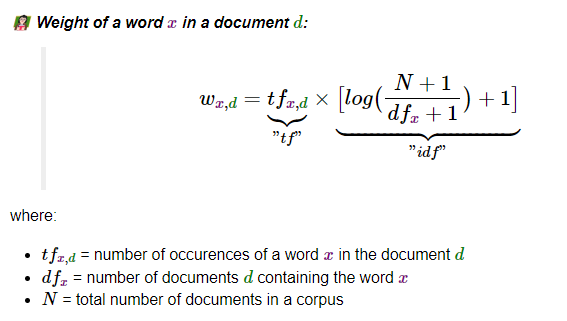

###### Tfid code

In [ ]:
vectorizer = TfidfVectorizer(
    max_df=2,               #"ignore terms that appear in more than X documents"
#     max_df=0.5,           #"ignore terms that appear in more than X% of the documents"
#     min_df=2,
#     min_df=0.5,
    max_features=6,         # Top k tokens ordered by term frequency

    ngram_range = (1, 1)    # unigrams (single words)
#     ngram_range = (2, 2)    # only bi-grams    
#     ngram_range = (1, 2)    # unigrams and bigrams
#     ngram_range = (1, 3)    # unigrams, bigrams, and trigrams
#     ngram_range = (2, 3)    # bigrams, and trigrams (but not the unigrams)    

)

words_vectorized = vectorizer.fit_transform(texts)

words = vectorizer.get_feature_names_out();

words_df = pd.DataFrame(
    words_vectorized.toarray(),
    columns = words)

words_df

## Models

##### <font color='blue'>Naive Bayes</font> classifier

The Naive Bayes algorithm makes the strong assumption that the words in an e-mail are conditionally independent

In [ ]:
model = MultinomialNB()

##### <font color='blue'>LDA</font> - Latent Dirichlet Allocation Algorithm (unsupervised)

Finding topics in documents
- "Latent" = hidden (topics)
- "Dirichlet" = type of probability distribution
    - Document > collection of topics
    - Topic > collection of tokens/words

In [ ]:
n_components = 2

lda_model = LatentDirichletAllocation(
    n_components=n_components,                            # nb de topics
    max_iter = 100
)

lda_model.fit(words_vectorized)

doc_score = lda_model.transform(words_vectorized) # poids de chaque topic dans chaque document / ligne
                                               # par document, somme des poids = 1
    
topics_words_mixture = pd.DataFrame(
    lda_model.components_,                     # topic * vecteur 
    columns = words
)

topics_words_mixture

**Top words for each topic**

In [ ]:
nb_top_words = 2
topics_top_words = pd.DataFrame(index=topics_words_mixture.index , columns=['top_words', 'top_weights'])

for topic in range(n_components):
    top_words = []
    top_weights = []
    
    for i in range(nb_top_words):
        top_words.append(topics_words_mixture.iloc[topic].sort_values(ascending=False).index[i])
        top_weights.append(topics_words_mixture.iloc[topic].sort_values(ascending=False).iloc[i])

    topics_top_words.iloc[topic, 0] = top_words
    topics_top_words.iloc[topic, 1] = top_weights
    
topics_top_words

**Nb of documents per topic**

**Most relevant topic**

In [ ]:
def print_topics(lda_model, vectorizer, top_words):
    topic_mixture = pd.DataFrame(
        lda_model.components_,
        columns = vectorizer.get_feature_names_out()
    )
    
    n_components = topic_mixture.shape[0]

    for topic in range(n_components):
        print("-"*10)
        print(f"For topic {topic}, here are the the top {top_words} words with weights:")

        topic_df = topic_mixture.iloc[topic]\
            .sort_values(ascending = False).head(top_words)
        
        print(round(topic_df,3))

In [ ]:
print_topics(model, vectorizer, 5)

# Pipeline

##### Initialisation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_c, y_titanic_c, test_size=0.3, random_state=6)

##### <font color='blue'>Stateless custom transformer</font>

In [ ]:
stateless_transformer1 = FunctionTransformer(
    lambda array: np.round(array, decimals=2))

##### <font color='blue'>Statefull custom transformer</font>

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator

class CustomStandardizer(TransformerMixin, BaseEstimator):

    def __init__(self, shrink_factor = 1):
        self.shrink_factor = shrink_factor

    def fit(self, X, y=None):
        self.mu = X.mean()
        self.sigma = np.std(X)
        return self
    
    def transform(self, X, y=None): 
        return ( X - self.mu ) / (self.sigma * self.shrink_factor )
    
    def inverse_transform(self, X, y=None):
        return X * ( self.sigma * self.shrink_factor ) + self.mu

##### Pipeline

<font color='red'>verbose_feature_names_out : je ne comprends pas</font>

In [ ]:
# Define list of features to be treated similarly
features_num = make_column_selector(dtype_include=['float64', 'int64'])
features_cat = make_column_selector(dtype_include=['object','bool'])

# Define sequential steps with a pipeline
scaling_num = make_pipeline(                   
    SimpleImputer(strategy='median'), 
    RobustScaler(),
    stateless_transformer1
)

encoding_cat = make_pipeline(                   
    SimpleImputer(strategy='most_frequent'), 
    OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'),
)

# Define parallel steps and affect them to columns with a column transformer
preprocessing = make_column_transformer(
    (scaling_num, features_num),            # or (scaling_num, ['age', 'bmi'])
    (encoding_cat, features_cat),           # or (encoding_cat, ['smoker', 'region'])
#     (drop, other_columns),
#     (passthrough, other_columns),
    remainder='drop',                        # 'drop' or 'passthrough'
#     sparse_threshold=0.3                    # ?
    n_jobs=-1,
)

# # Define parallel steps
# new_feature = make_union(
#     preprocessing, 
#     stateless_transformer2)               # this example make no sense here

# Use a pipeline at the end to apply a model
pipe = make_pipeline(preprocessing, LogisticRegression())

pipe;

In [ ]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

In [ ]:
# Access the intermediate steps:

preprocessing.fit(X_train, y_train)
preprocessing.transform(X_train)
preprocessing.transform(X_train)

pipe_tuned.named_steps.keys()
pipe_tuned.named_steps["columntransformer"].fit_transform(X_train).shape

##### GridSearch a Pipeline

In [ ]:
pipe.get_params();

In [ ]:
grid = {
    'columntransformer__pipeline-1__simpleimputer__strategy': ['mean', 'median'],
    'logisticregression__fit_intercept': [True, False],
}

search = GridSearchCV(
    pipe,
    grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

search.fit(X_train, y_train)
search.best_score_
search.best_estimator_
search.best_params_

In [ ]:
pipe_tuned = search.best_estimator_
pipe_tuned

##### Caching

In [ ]:
cachedir = mkdtemp()
pipeline = Pipeline(pipe.named_steps.keys(), memory=cachedir)
rmtree(cachedir)

##### Export models / pipelines

In [ ]:
import pickle

# Export Pipeline as pickle file
with open("pipeline.pkl", "wb") as file:
    pickle.dump(pipe_tuned, file)

In [ ]:
# Load Pipeline from pickle file

my_pipeline = pickle.load(open("pipeline.pkl","rb"))

my_pipeline.score(X_test, y_test)

# 
***
***
***
***

# draft

### <font color='red'>A ficher</font>

lazypredict

https://lazypredict.readthedocs.io/en/latest/usage.html

AutoML

tpot - Tree-based Pipeline Optimization Tool (TPOT) 

http://epistasislab.github.io/tpot/

### Linear regression

In [ ]:
model = smf.ols(formula= target_std + '~' + '+'.join(features_num_selected_std), data=mpg).fit()
model2 = smf.ols(formula= target_std + '~' + '+'.join(features_num_selected) + '+ C(origin) -1', data=mpg).fit()
model.summary()

##### Partial regression plots

In [ ]:
fig = plt.figure(figsize=(10,6));
fig = sm.graphics.plot_partregress_grid(model, fig=fig);

fig.subplots_adjust(top=0.9)
for ax in fig.axes:
    ax.grid(axis="both", lw=0.5, ls=':')
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax.spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax.tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

##### Residuals and real vs prediction

In [ ]:
##### Figure
mosaic_str = '''ACB
                ACB
                '''
mosaiq_li = ['A', 'B', 'C']
fig = plt.figure(constrained_layout=False, figsize=(10,3))
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.2)
ax = fig.subplot_mosaic(mosaic_str)
fig.suptitle('Prediction of acceleration - linear model',color='#3f3f3f', y=1.2, fontweight='bold', fontsize='large')

##### Data
sns.histplot(data=model.resid, 
             kde=True, bins=20, cumulative=False, 
             shrink=0.8, edgecolor=None,
             ax=ax['A']);

sm.qqplot(
    data=model.resid,
    dist=sp.stats.norm(0,1),
    fit=False,
    line='45',
    ax=ax['C']
)

sns.regplot(x=model.predict(mpg),
            y=mpg[target_std],
            ax=ax['B']);

##### Style
for i in mosaiq_li:
    ax[i].grid(axis="both", lw=0.5, ls=':')
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].spines['left'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].spines['bottom'].set(color='#3f3f3f', linewidth='0.5', position=('axes', 0))
    ax[i].tick_params(axis='both', color='#3f3f3f', colors='#3f3f3f', labelsize='x-small')

ax['A'].set_xlabel('Residuals', loc='center', color='#3f3f3f', fontsize='small')
ax['A'].set_ylabel(ax['A'].get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

ax['C'].set_xlabel(ax['C'].get_xlabel(), loc='center', color='#3f3f3f', fontsize='small')
ax['C'].set_ylabel(ax['C'].get_ylabel(), loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

ax['B'].set_xlabel('Prediction std', loc='center', color='#3f3f3f', fontsize='small')
ax['B'].set_ylabel('Real data std', loc='center', color='#3f3f3f', fontsize='small', rotation='vertical', labelpad=4)

ax['A'].set_title('Histogram of the residuals', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax['B'].set_title('Real data against prediction std', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'})
ax['C'].set_title('QQ Plot of the residuals', loc='left', pad=10, fontdict={'fontsize':'medium', 'color':'#3f3f3f'});